In [186]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import import_ipynb
import Lib.Functions as fc
import Lib.Feature_Selection as ft
import warnings
warnings.filterwarnings('ignore')

In [2]:
demographics = pd.read_csv('ICKDemographicsPipeline_v260423.csv')
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173193 entries, 0 to 173192
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UserID          173193 non-null  object 
 1   TotalChild      173193 non-null  int64  
 2   MedianChildAge  173193 non-null  float64
 3   No.Female       173193 non-null  float64
 4   No.Male         173193 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.6+ MB


In [201]:
demographics

,UserID,TotalChild,MedianChildAge,No.Female,No.Male
0,00002520-3fe9-4d4b-9e1f-e4a72386bf47,1,5.8,0.0,1.0
1,00007f9f-be36-4a0d-a2a8-167231588625,1,13.3,0.0,1.0
2,00015787-1ed9-45b9-9c5f-2613e2ca8409,1,7.3,1.0,0.0
3,0001f256-edcf-4980-b84b-85d85745fd0f,1,11.3,0.0,1.0
4,000234a9-a233-4476-9023-9b83f331b7f6,1,5.2,0.0,1.0
...,...,...,...,...,...
173188,fffdf7d4-a6c3-46e6-bbb7-045211d7007f,1,6.7,1.0,0.0
173189,ffff2125-692f-4755-bfcd-59219e49d6d6,2,7.0,1.0,1.0
173190,ffff56de-effe-4b67-9990-33240f51c866,1,9.6,1.0,0.0
173191,ffff81a7-4938-4d26-8492-bd8e4acc2a19,1,3.5,1.0,0.0


In [3]:
df_pay = pd.read_csv('RealPaymentsType.csv')
df_pay['UserJoinedDate'] = df_pay['UserJoinedDate'].map(lambda x: x[: 19])
df_pay['UserJoinedDate'] = pd.to_datetime(df_pay['UserJoinedDate'], format = '%Y-%m-%d %H:%M:%S')
df_pay['JoinMonth'] = df_pay['UserJoinedDate'].dt.month

payment = df_pay[['UserID', 'UserJoinedDate', 'gapday']]
payment.shape

(265308, 3)

In [4]:
detail = pd.read_csv('Engagement_detail_learn_updated.csv')
detail['InteractionLearn'] = detail['UsageTime'] * detail['Records']

detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506702 entries, 0 to 1506701
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   EventDate                  1506702 non-null  object 
 1   nth_day_from_registration  1506702 non-null  int64  
 2   UserID                     1506702 non-null  object 
 3   SubjectName                1506702 non-null  object 
 4   IsCompleted                1506702 non-null  int64  
 5   UsageTime                  1506702 non-null  float64
 6   Records                    1506702 non-null  int64  
 7   InteractionLearn           1506702 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ MB


In [205]:
a = pd.read_csv('Engagement_detail_learn_updated.csv')
a['InteractionLearn'] = a['UsageTime'] * a['Records']

a.head(10)

,EventDate,nth_day_from_registration,UserID,SubjectName,IsCompleted,UsageTime,Records,InteractionLearn
0,2022-11-20,0,2ae58788-79c4-4f46-8000-7274677408f5,vietnamese,1,9.15,11,100.65
1,2022-10-26,4,8d0a1e7e-30c9-4b2a-8000-f6033de2091f,vietnamese,1,1.35,2,2.70
2,2022-11-14,23,8d0a1e7e-30c9-4b2a-8000-f6033de2091f,vietnamese,0,0.52,1,0.52
3,2022-11-14,23,8d0a1e7e-30c9-4b2a-8000-f6033de2091f,vietnamese,1,1.82,4,7.28
4,2022-11-26,35,8d0a1e7e-30c9-4b2a-8000-f6033de2091f,english,1,2.08,2,4.16
5,2022-11-27,36,8d0a1e7e-30c9-4b2a-8000-f6033de2091f,english,1,1.60,3,4.80
6,2022-12-11,50,8d0a1e7e-30c9-4b2a-8000-f6033de2091f,english,1,3.67,5,18.35
7,2022-12-11,50,8d0a1e7e-30c9-4b2a-8000-f6033de2091f,vietnamese,1,16.53,19,314.07
8,2022-06-29,0,0870725c-ffd3-4e34-8001-00cc7adda11f,vietnamese,1,2.20,3,6.60
9,2022-06-30,1,0870725c-ffd3-4e34-8001-00cc7adda11f,vietnamese,0,0.70,2,1.40


In [5]:
detail = pd.merge(left=detail,
                  right=payment,
                  how='left',
                  on='UserID')
detail.shape

(1506702, 10)

In [6]:
firstday_learn = pd.DataFrame(detail.groupby(['UserID'])['nth_day_from_registration'].min()).reset_index()
firstday_learn.columns = ['UserID', 'MinFirstDay']

firstday_learn['ZeroDay'] = firstday_learn['MinFirstDay'].map(lambda x: 'zero' if x == 0 else 'other')
firstday_learn.shape

(153340, 3)

In [7]:
detail = pd.merge(left=detail,
                  right=firstday_learn,
                  how='left',
                  on='UserID')

detail.loc[detail['gapday'].isnull(), 'gapday'] = 'no_pay'
detail.shape

(1506702, 12)

In [8]:
def DetailBasedNthDay(dataframe, nthday=8):
    pay = dataframe.loc[dataframe['gapday'] != 'no_pay']
    
    mask0 = pay['ZeroDay'] == 'zero'
    mask1 = pay['nth_day_from_registration'] <= nthday
    df0 = pay[mask0 & mask1]
    
    df0['CutoffDay'] = df0['MinFirstDay'] + nthday
    df0['ScaleActionDay'] = df0['nth_day_from_registration'] - 0
    df0['ScaleGapday'] = df0['gapday'] - df0['MinFirstDay']
    
    mask2 = pay['ZeroDay'] != 'zero'
    others = pay[mask2]
    others['CutoffDay'] = others['MinFirstDay'] + nthday
    
    mask3 = others['nth_day_from_registration'] <= others['CutoffDay']
    df1 = others[mask3]
    df1['ScaleActionDay'] = df1['nth_day_from_registration'] - df1['MinFirstDay']
    df1['ScaleGapday'] = df1['gapday'] - df1['MinFirstDay']
    
    purchaser = pd.concat([df0, df1], ignore_index=True)
    
    free = dataframe.loc[dataframe['gapday'] == 'no_pay']
    f0 = free['ZeroDay'] == 'zero'
    f1 = free['nth_day_from_registration'] <= nthday
    free0 = free[f0 & f1]
    
    free0['CutoffDay'] = free0['MinFirstDay'] + nthday
    free0['ScaleActionDay'] = free0['nth_day_from_registration'] - 0
    free0['ScaleGapday'] = free0['gapday']
    
    non0 = free.loc[free['ZeroDay'] != 'zero']
    non0['CutoffDay'] = non0['MinFirstDay'] + nthday
    f3 = non0['nth_day_from_registration'] <= non0['CutoffDay']
    free1 = non0[f3]
    free1['ScaleActionDay'] = free1['nth_day_from_registration'] - free1['MinFirstDay']
    free1['ScaleGapday'] = free1['gapday']
    
    non_purchaser = pd.concat([free0, free1], ignore_index=True)
    
    data = pd.concat([purchaser, non_purchaser], ignore_index=True)
    
    return data

In [9]:
learn_detail = DetailBasedNthDay(detail, nthday=8)

In [203]:
learn_detail.head()

,EventDate,nth_day_from_registration,UserID,SubjectName,IsCompleted,UsageTime,Records,InteractionLearn,UserJoinedDate,gapday,MinFirstDay,ZeroDay,CutoffDay,ScaleActionDay,ScaleGapday
0,2022-05-24,0,9f50fe75-c924-4125-8004-bd3dec9b3ea5,english,1,15.95,23,366.85,2022-05-24 20:12:07,0.0,0,zero,8,0,0.0
1,2022-05-25,1,9f50fe75-c924-4125-8004-bd3dec9b3ea5,english,0,0.63,2,1.26,2022-05-24 20:12:07,0.0,0,zero,8,1,0.0
2,2022-05-25,1,9f50fe75-c924-4125-8004-bd3dec9b3ea5,english,1,26.55,31,823.05,2022-05-24 20:12:07,0.0,0,zero,8,1,0.0
3,2022-05-26,2,9f50fe75-c924-4125-8004-bd3dec9b3ea5,english,1,7.55,13,98.15,2022-05-24 20:12:07,0.0,0,zero,8,2,0.0
4,2022-05-27,3,9f50fe75-c924-4125-8004-bd3dec9b3ea5,english,0,1.22,1,1.22,2022-05-24 20:12:07,0.0,0,zero,8,3,0.0


In [10]:
content_learn = learn_detail.pivot_table(index = 'UserID',
                                         columns = 'SubjectName',
                                         values = ['IsCompleted', 'UsageTime', 'Records', 'InteractionLearn'],
                                         aggfunc = np.sum).reset_index()

cols = ['UserID',
        'InteractionEnglish', 'InteractionMath', 'InteractionPhonics', 'InteractionVietnamese',
        'IsCompletedEnglish', 'IsCompletedMath','IsCompletedPhonics', 'IsCompletedVietnamese',
        'RecordEnglish', 'RecordMath', 'RecordPhonics', 'RecordVietnamese',
        'UsageTimeEnglish', 'UsageTimeMath', 'UsageTimePhonics', 'UsageTimeVietnamese']

content_learn.columns = cols

for col in content_learn.columns[1:]:
    content_learn.loc[content_learn[col].isnull(), col] = 0
    
content_learn.shape

(153340, 17)

In [11]:
engage = pd.read_csv('RealEngagements_updated.csv')
engage['UserJoinedDate'] = engage['UserJoinedDate'].map(lambda x: x[: 19])
engage['UserJoinedDate'] = pd.to_datetime(engage['UserJoinedDate'], format = '%Y-%m-%d %H:%M:%S')

engage['lastuse'] = engage['lastuse'].map(lambda x: x[: 19])
engage['lastuse'] = pd.to_datetime(engage['lastuse'], format = '%Y-%m-%d %H:%M:%S')

engage['firstuse'] = engage['firstuse'].map(lambda x: x[: 19])
engage['firstuse'] = pd.to_datetime(engage['firstuse'], format = '%Y-%m-%d %H:%M:%S')

engage['firstuse_hour'] = engage['firstuse'].dt.hour
engage['lastuse_hour'] = engage['lastuse'].dt.hour
engage['lastuse_day'] = engage['lastuse'].dt.day
engage['lastuse_dayofweek'] = engage['lastuse'].dt.dayofweek
engage['JoinMonth'] = engage['UserJoinedDate'].dt.month

engage.shape

(1638631, 17)

In [12]:
engage = pd.merge(left=engage,
                  right=payment[['UserID', 'gapday']],
                  on='UserID',
                  how='left')
engage.shape

(1638631, 18)

In [13]:
brand = engage['DeviceBrand'].value_counts()

Big = brand[brand >= 100000].index.tolist()
Medium = brand[(brand >= 10000) & (brand < 100000)].index.tolist()
Small = brand[brand < 10000].index.tolist()

def TransformBrand(x):
    if x in Big:
        return 'Big'
    elif x in Medium:
        return 'Medium'
    else:
        return 'Small'

engage['TypeBrand'] = engage['DeviceBrand'].map(lambda x: TransformBrand(x))

engage.loc[engage['gapday'].isnull(), 'gapday'] = 'no_pay'

In [14]:
firstday = pd.DataFrame(engage.groupby(['UserID'])['nth_day_from_registration'].min()).reset_index()
firstday.columns = ['UserID', 'MinFirstDay']

firstday['ZeroDay'] = firstday['MinFirstDay'].map(lambda x: 'zero' if x == 0 else 'other')
firstday.shape

(163040, 3)

In [15]:
engage = pd.merge(left=engage,
                  right=firstday,
                  how='left',
                  on='UserID')
engage.shape

(1638631, 21)

In [16]:
action = DetailBasedNthDay(engage, nthday=8)

In [17]:
action.shape

(568066, 24)

In [18]:
Recency = lambda x: 9 - max(x)

Frequency_content = lambda x: len(x.unique()) 
Frequency_payment = lambda x: sum(x)

Monetary_usage = lambda x: sum(x)  
Monetary_record = lambda x: sum(x) 

Mode_firstuse_hour = lambda x: x.mode()[0]
Mode_lastuse_day = lambda x: x.mode()[0]
Mode_lastuse_hour = lambda x: x.mode()[0]
Mode_lastuse_dayofweek = lambda x: x.mode()[0]

active = action.groupby('UserID').agg({'ScaleActionDay': Recency,
                                     'firstuse': Frequency_content,
                                     'payment_screen_time': Frequency_payment,
                                     'UsageTime': Monetary_usage,
                                     'Records': Monetary_record,
                                     'firstuse_hour': Mode_firstuse_hour,
                                     'lastuse_hour': Mode_lastuse_hour,
                                     'lastuse_day': Mode_lastuse_day,
                                     'lastuse_dayofweek': Mode_lastuse_dayofweek}).reset_index()

cols = ['UserID', 'Recency', 'ContentFrequent', 'PaymentScreenFrequent', 
        'TotalUsageTime','TotalRecords', 'ModeFirstHour', 'ModeLastHour', 'ModeLastDay', 'ModeDayofweek']

active.columns = cols

In [213]:
active.head()

,UserID,Recency,ContentFrequent,PaymentScreenFrequent,TotalUsageTime,TotalRecords,ModeFirstHour,ModeLastHour,ModeLastDay,ModeDayofweek
0,00002520-3fe9-4d4b-9e1f-e4a72386bf47,9,1,0,17.68,18,22,22,11,0
1,00007f9f-be36-4a0d-a2a8-167231588625,9,1,0,6.85,3,18,18,12,1
2,00015787-1ed9-45b9-9c5f-2613e2ca8409,1,15,79,286.28,270,18,20,18,0
3,0001f256-edcf-4980-b84b-85d85745fd0f,8,3,0,42.56,61,8,20,22,4
4,000234a9-a233-4476-9023-9b83f331b7f6,9,2,0,14.59,27,18,18,16,6


In [19]:
Median_usage = lambda x: x.median()
Median_record = lambda x: x.median()
Median_payment_screentime = lambda x: x.median()

active_median = action.groupby('UserID').agg({'UsageTime': Median_usage,
                                            'Records': Median_record,
                                            'payment_screen_time': Median_payment_screentime}).reset_index()

cols = ['UserID', 'MedianUsageTime', 'MedianRecord', 'MedianPaymentScreen']

active_median.columns = cols

In [20]:
action['Counting'] = [1] * action.shape[0]

brand = action.pivot_table(index = 'UserID',
                             columns = 'TypeBrand',
                             values = ['Counting'],
                             aggfunc = np.sum).reset_index()

brand_cols = ['UserID', 'BigBrand', 'MediumBrand', 'SmallBrand']
        
brand.columns = brand_cols

for col in brand.columns[1:]:
    brand.loc[brand[col].isnull(), col] = 0
    
brand.shape

(163040, 4)

In [21]:
content_sum = action.pivot_table(index = 'UserID',
                                    columns = 'ActionType',
                                    values = ['UsageTime', 'Records'],
                                    aggfunc = np.sum).reset_index()

new_cols = ['UserID',
            'RecordDiscovery', 'RecordEntertainment', 'RecordLearn',
            'UsageTimeDiscovery', 'UsageTimeEntertainment', 'UsageTimeLearn']

content_sum.columns = new_cols

for col in content_sum.columns[1:]:
    content_sum.loc[content_sum[col].isnull(), col] = 0

In [22]:
Number_of_device = lambda x: len(x.unique())

demo = action.groupby('UserID').agg({'TypeBrand': Number_of_device}).reset_index()

demo.columns = ['UserID', 'No.TypeBrand']

demo

,UserID,No.TypeBrand
0,00002520-3fe9-4d4b-9e1f-e4a72386bf47,1
1,00007f9f-be36-4a0d-a2a8-167231588625,1
2,00015787-1ed9-45b9-9c5f-2613e2ca8409,1
3,0001f256-edcf-4980-b84b-85d85745fd0f,1
4,000234a9-a233-4476-9023-9b83f331b7f6,1
...,...,...
163035,fffdf7d4-a6c3-46e6-bbb7-045211d7007f,1
163036,ffff2125-692f-4755-bfcd-59219e49d6d6,1
163037,ffff56de-effe-4b67-9990-33240f51c866,1
163038,ffff81a7-4938-4d26-8492-bd8e4acc2a19,1


In [23]:
print(active.shape)
print(content_sum.shape)
print(active_median.shape)
print(brand.shape)
print(content_learn.shape)
print(demo.shape)
print(demographics.shape)

(163040, 10)
(163040, 7)
(163040, 4)
(163040, 4)
(153340, 17)
(163040, 2)
(173193, 5)


In [24]:
data_list = [active, demographics, demo, brand, content_learn, content_sum, active_median, 
             df_pay[['UserID', 'firstPaymentType', 'JoinMonth','gapday']]]

final = active.copy()

for x in data_list[1:]:
    final = pd.merge(left=final,
                     right=x,
                     how='left',
                     on='UserID')
final.shape

(163040, 46)

In [25]:
null_idx = final.loc[final['TotalChild'].isnull()].index.tolist()

final = final.drop(null_idx)
final.shape

(158981, 46)

In [120]:
data = final.copy()

In [121]:
learning_detail = ['InteractionEnglish', 'InteractionMath','InteractionPhonics', 'InteractionVietnamese', 
                   'IsCompletedEnglish', 'IsCompletedMath', 'IsCompletedPhonics', 'IsCompletedVietnamese',
                   'RecordEnglish', 'RecordMath', 'RecordPhonics', 'RecordVietnamese',
                   'UsageTimeEnglish', 'UsageTimeMath', 'UsageTimePhonics', 'UsageTimeVietnamese']

for col in learning_detail:
    data.loc[data[col].isnull(), col] = 0

In [122]:
data['AvgTimePerCompletion'] = data['TotalUsageTime'] / data['TotalRecords']
data['InteractionGeneral'] = data['TotalUsageTime'] * data['TotalRecords']
data['InteractionLearn'] = data['UsageTimeLearn'] * data['RecordLearn']
data['InteractionDiscovery'] = data['UsageTimeDiscovery'] * data['RecordDiscovery']
data['InteractionEntertainment'] = data['UsageTimeEntertainment'] * data['RecordEntertainment']
data['MedianInteraction'] = data['MedianUsageTime'] * data['MedianRecord']

In [123]:
data['Label'] = data['gapday'].map(lambda x: 1 if x <= 31 else 0)

In [124]:
data['Label'].value_counts()

0    148681
1     10300
Name: Label, dtype: int64

In [125]:
data1 = data.copy()

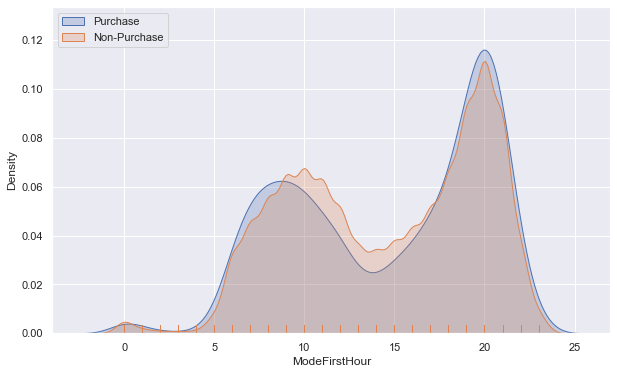

In [32]:
plt.figure(figsize=(10, 6))
sb.distplot(data.loc[data['Label'] == 1]['ModeFirstHour'], kde_kws={'shade':'kde_kws'},
                                                             hist = False, rug = True,label='Purchase')
sb.distplot(data.loc[data['Label'] == 0]['ModeFirstHour'], kde_kws={'shade':'kde_kws'},
                                                             hist = False, rug = True,label='Non-Purchase')
plt.legend(loc='upper left');

In [126]:
excludes = ['firstPaymentType', 'Recency', 'ContentFrequent', 'PaymentScreenFrequent', 'TotalChild', 
            'MedianChildAge', 'No.Female', 'No.Male', 'No.TypeBrand', 'BigBrand', 'MediumBrand',
            'SmallBrand', 'Label', 'gapday', 'JoinMonth', 'ModeFirstHour', 'ModeLastHour', 'ModeLastDay',
            'ModeDayofweek']

for col in data.columns[1:]:
    if col not in excludes:
        if data[col].min() == 0:
            data[col] = data[col] + 1
            data[col] = np.log(data[col])
        else:
            data[col] = np.log(data[col])

In [127]:
data.to_csv('ICK_Active8thdays.csv', index=False)

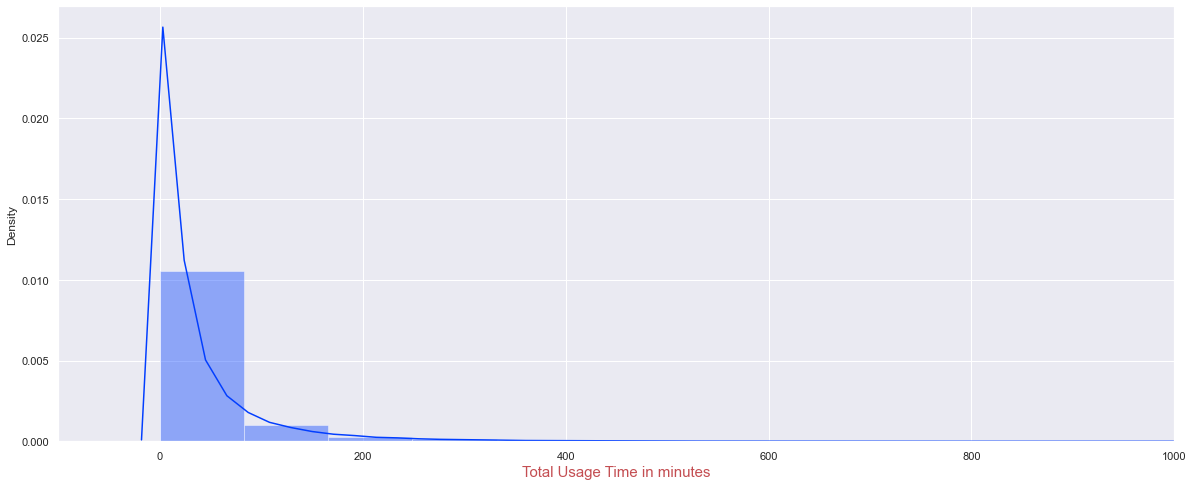

In [212]:
plt.figure(figsize=(20, 8))
sb.distplot(data1['TotalUsageTime'])
plt.xlim([-100, 1000])
plt.xlabel('Total Usage Time in minutes', fontsize=15, color='r');

----- TotalUsageTime -----
count    158981.000000
mean          2.778979
std           1.375596
min           0.000000
25%           1.695616
50%           2.820188
75%           3.789855
max           8.331107
Name: TotalUsageTime, dtype: float64
* Variance: 1.892264288166474
* Median: 2.8201877010390604
* Skewness: 0.054617780855471185
* Kurtosis: -0.7286186455015398
* Percentage of outliers: 0.0001635415552801907
* Number of missing value: 0


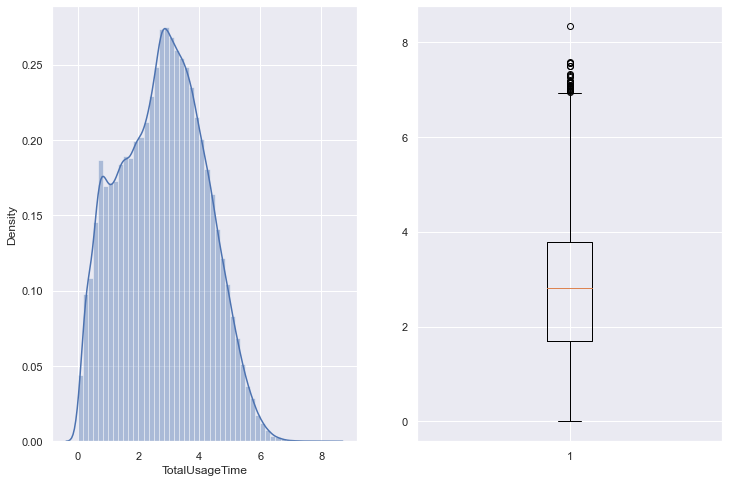


----- TotalRecords -----
count    158981.000000
mean          2.671008
std           1.395783
min           0.000000
25%           1.609438
50%           2.833213
75%           3.688879
max           7.327781
Name: TotalRecords, dtype: float64
* Variance: 1.9482106523961966
* Median: 2.833213344056216
* Skewness: -0.14176622594039573
* Kurtosis: -0.6211525356524277
* Percentage of outliers: 5.0320478547750986e-05
* Number of missing value: 0


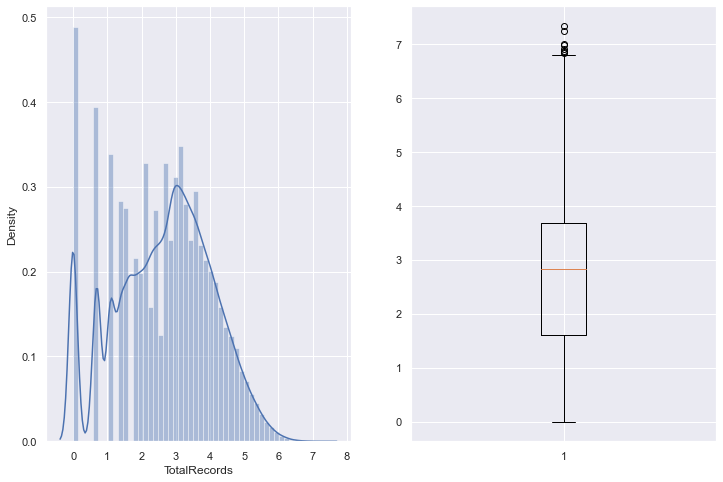


----- InteractionEnglish -----
count    158981.000000
mean          2.207746
std           2.515053
min           0.000000
25%           0.000000
50%           0.862890
75%           4.599052
max          12.819008
Name: InteractionEnglish, dtype: float64
* Variance: 6.325491169633279
* Median: 0.8628899551470398
* Skewness: 0.6793660501030334
* Kurtosis: -0.9525738262954118
* Percentage of outliers: 2.5160239273875493e-05
* Number of missing value: 0


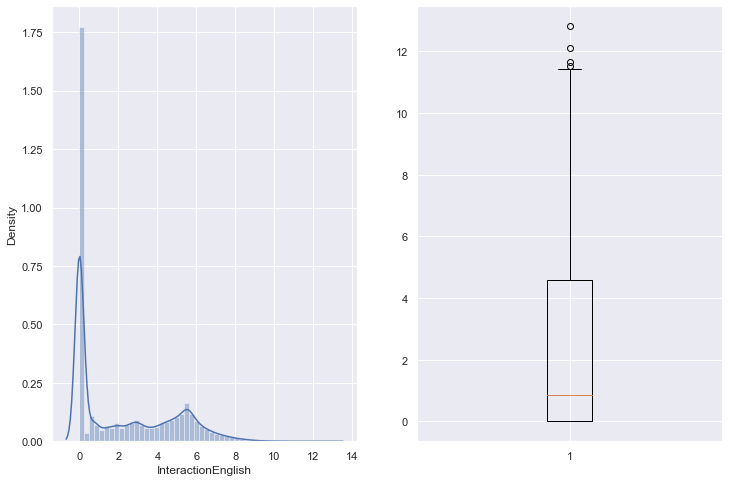


----- InteractionMath -----
count    158981.000000
mean          0.094781
std           0.673224
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.611344
Name: InteractionMath, dtype: float64
* Variance: 0.45323044046635563
* Median: 0.0
* Skewness: 8.310124340389246
* Kurtosis: 74.45362599097795
* Percentage of outliers: 0.030506790119574037
* Number of missing value: 0


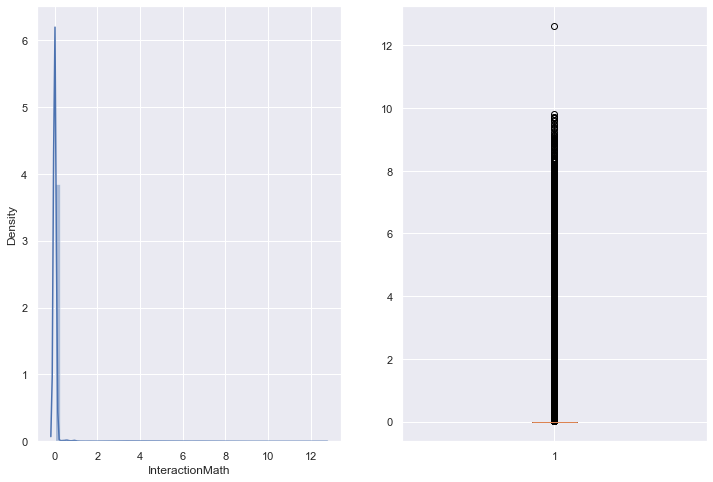


----- InteractionPhonics -----
count    158981.000000
mean          0.108579
std           0.680501
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.229654
Name: InteractionPhonics, dtype: float64
* Variance: 0.46308192383770813
* Median: 0.0
* Skewness: 7.261787252492883
* Kurtosis: 56.5719708449375
* Percentage of outliers: 0.03495386241123153
* Number of missing value: 0


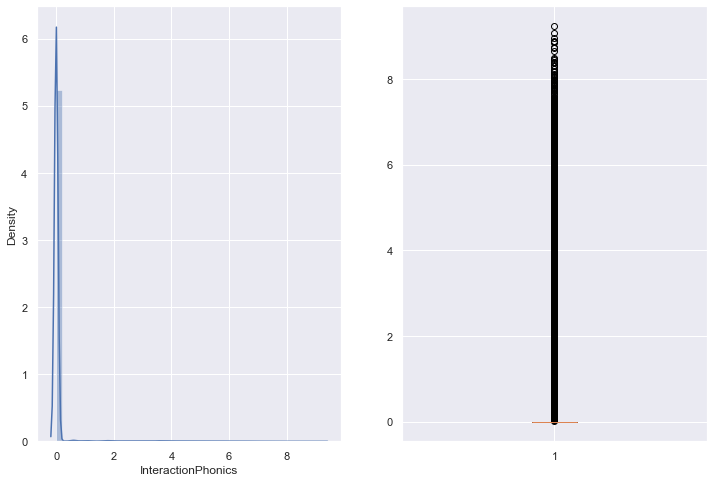


----- InteractionVietnamese -----
count    158981.000000
mean          2.348326
std           2.679920
min           0.000000
25%           0.000000
50%           0.978326
75%           4.672361
max          11.918754
Name: InteractionVietnamese, dtype: float64
* Variance: 7.181971814221205
* Median: 0.9783261227936078
* Skewness: 0.7413035879108866
* Kurtosis: -0.8186727489120491
* Percentage of outliers: 6.290059818468873e-06
* Number of missing value: 0


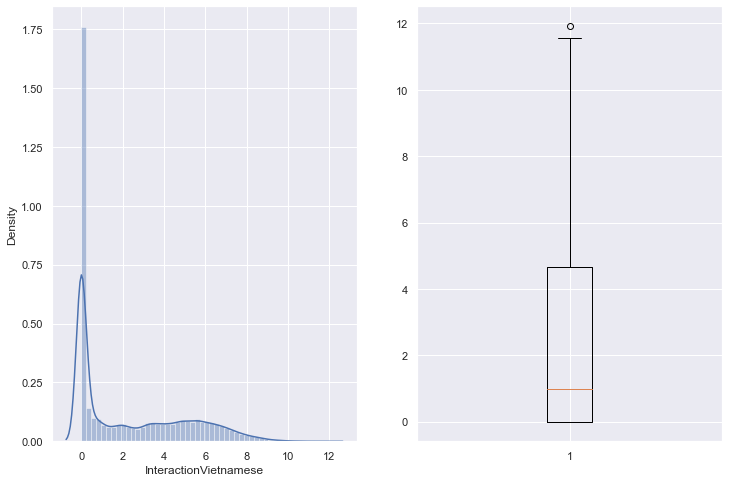


----- IsCompletedEnglish -----
count    158981.000000
mean          0.511778
std           0.545049
min           0.000000
25%           0.000000
50%           0.693147
75%           0.693147
max           2.302585
Name: IsCompletedEnglish, dtype: float64
* Variance: 0.297078701200647
* Median: 0.6931471805599453
* Skewness: 0.6875541784226888
* Kurtosis: -0.38836452537407284
* Percentage of outliers: 0.027789484277995484
* Number of missing value: 0


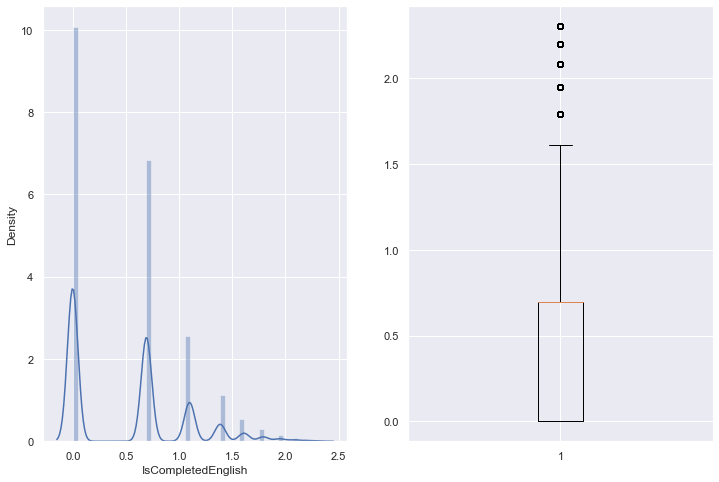


----- IsCompletedMath -----
count    158981.000000
mean          0.025770
std           0.162053
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.302585
Name: IsCompletedMath, dtype: float64
* Variance: 0.026261194449300012
* Median: 0.0
* Skewness: 7.146439416717087
* Kurtosis: 56.87633704879888
* Percentage of outliers: 0.02815430774746668
* Number of missing value: 0


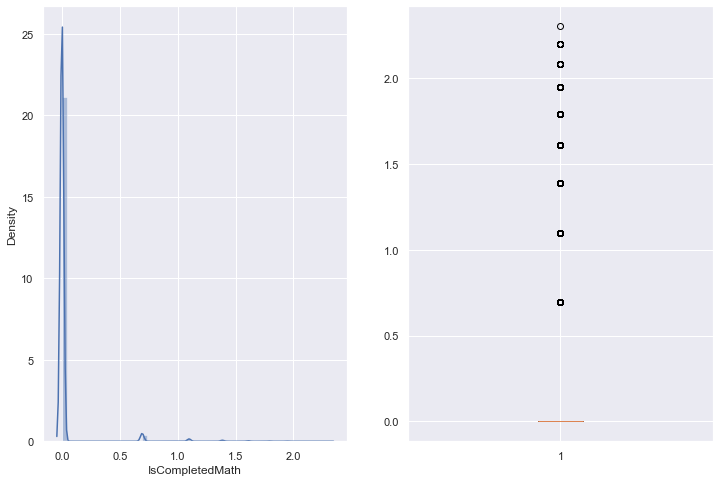


----- IsCompletedPhonics -----
count    158981.000000
mean          0.028461
std           0.165808
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.302585
Name: IsCompletedPhonics, dtype: float64
* Variance: 0.027492421130875286
* Median: 0.0
* Skewness: 6.519348603028749
* Kurtosis: 46.970497716124235
* Percentage of outliers: 0.03214220567237595
* Number of missing value: 0


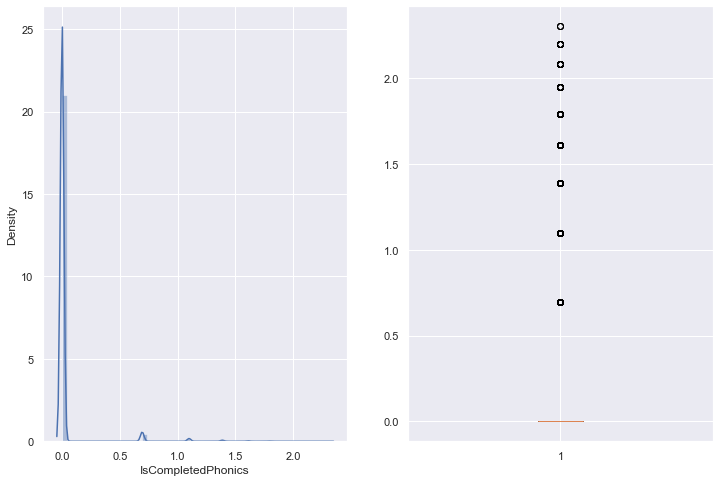


----- IsCompletedVietnamese -----
count    158981.000000
mean          0.536644
std           0.569913
min           0.000000
25%           0.000000
50%           0.693147
75%           0.693147
max           2.302585
Name: IsCompletedVietnamese, dtype: float64
* Variance: 0.3248006068639239
* Median: 0.6931471805599453
* Skewness: 0.7309395751110381
* Kurtosis: -0.29262407162199855
* Percentage of outliers: 0.04045766475239179
* Number of missing value: 0


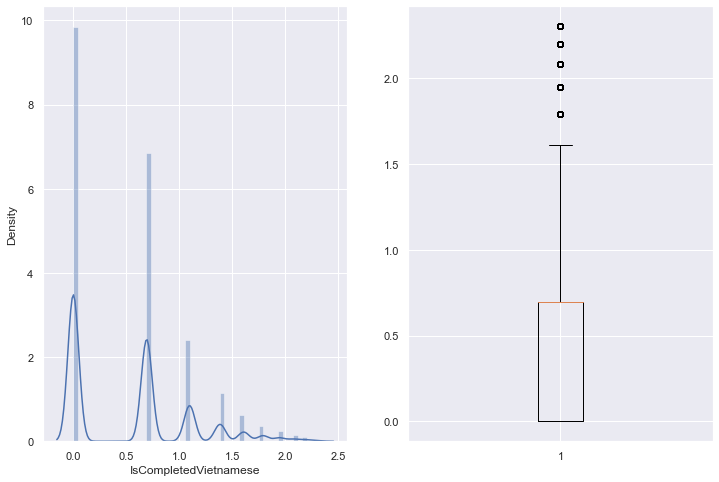


----- RecordEnglish -----
count    158981.000000
mean          1.393749
std           1.486710
min           0.000000
25%           0.000000
50%           1.098612
75%           2.772589
max           6.860664
Name: RecordEnglish, dtype: float64
* Variance: 2.2103062159278077
* Median: 1.0986122886681098
* Skewness: 0.5569718026320526
* Kurtosis: -1.0078049151717732
* Percentage of outliers: 0.0
* Number of missing value: 0


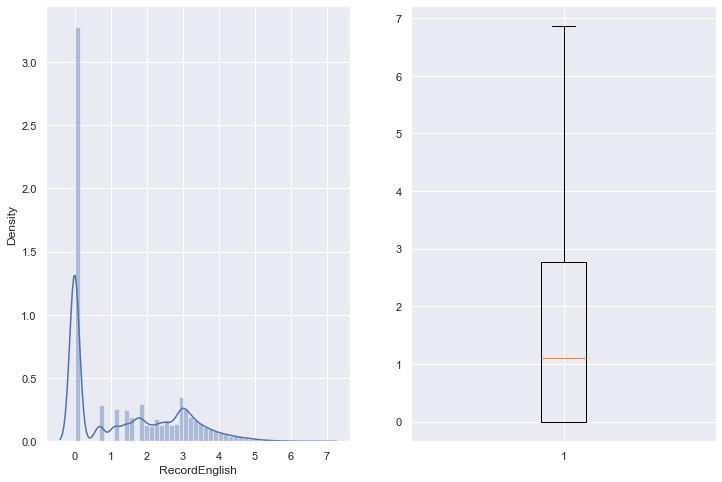


----- RecordMath -----
count    158981.000000
mean          0.062584
std           0.398914
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.066108
Name: RecordMath, dtype: float64
* Variance: 0.15913205955882165
* Median: 0.0
* Skewness: 7.365173224738272
* Kurtosis: 58.808432400620674
* Percentage of outliers: 0.030519370239210974
* Number of missing value: 0


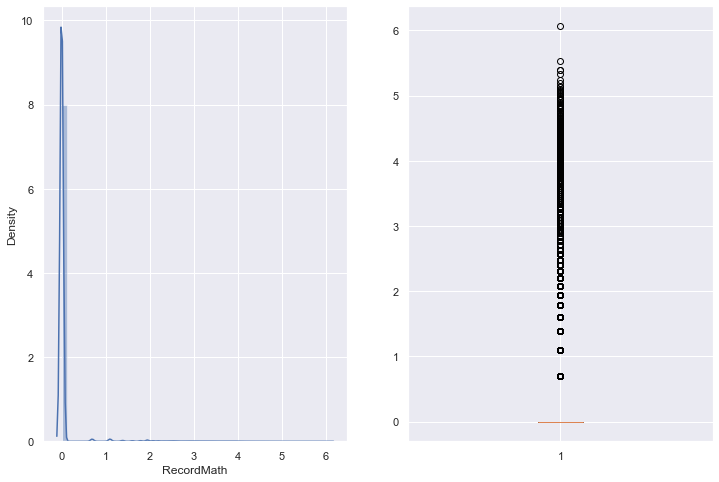


----- RecordPhonics -----
count    158981.000000
mean          0.069758
std           0.409138
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.583496
Name: RecordPhonics, dtype: float64
* Variance: 0.16739362481324882
* Median: 0.0
* Skewness: 6.703966219895036
* Kurtosis: 48.52320024577775
* Percentage of outliers: 0.034979022650505405
* Number of missing value: 0


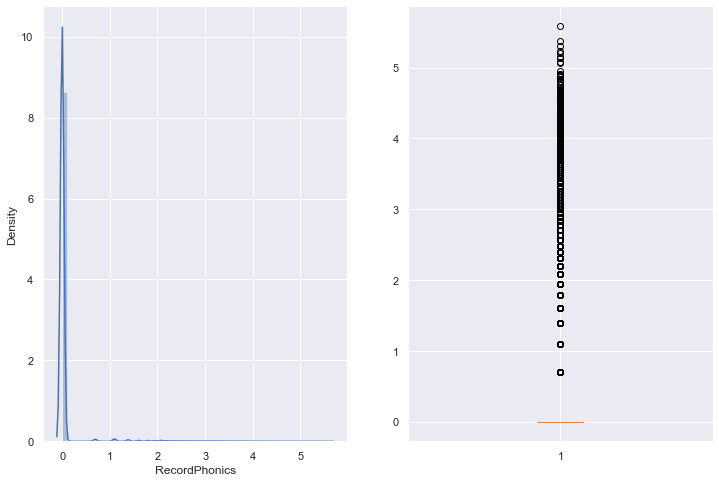


----- RecordVietnamese -----
count    158981.000000
mean          1.437494
std           1.519506
min           0.000000
25%           0.000000
50%           1.098612
75%           2.639057
max           6.900731
Name: RecordVietnamese, dtype: float64
* Variance: 2.3088972766417313
* Median: 1.0986122886681098
* Skewness: 0.67316283968653
* Kurtosis: -0.7351615554161217
* Percentage of outliers: 5.6610538366219865e-05
* Number of missing value: 0


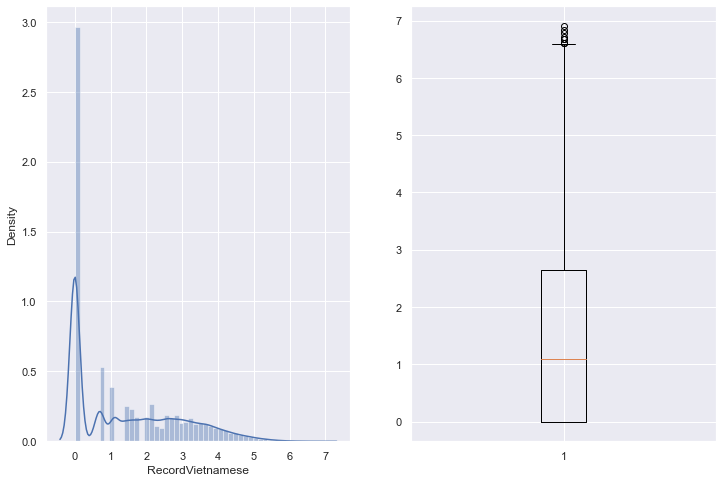


----- UsageTimeEnglish -----
count    158981.000000
mean          1.236061
std           1.375372
min           0.000000
25%           0.000000
50%           0.788457
75%           2.469793
max           7.300318
Name: UsageTimeEnglish, dtype: float64
* Variance: 1.8916477593090684
* Median: 0.7884573603642703
* Skewness: 0.7121484360391803
* Kurtosis: -0.6916291036131499
* Percentage of outliers: 0.00013209125618784633
* Number of missing value: 0


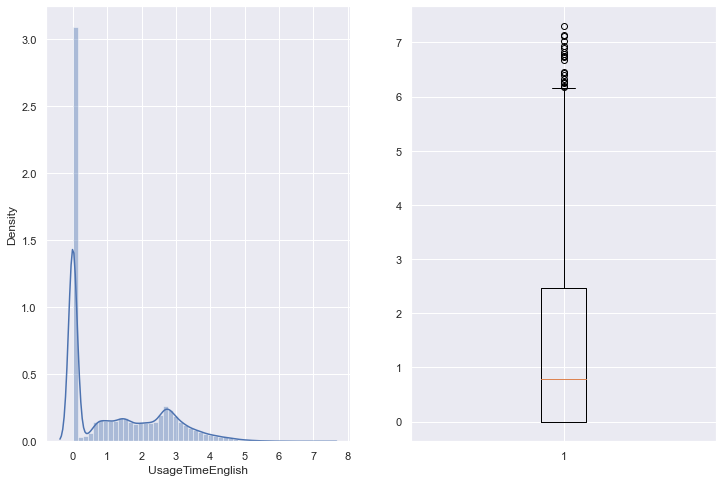


----- UsageTimeMath -----
count    158981.000000
mean          0.056043
std           0.389770
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.260881
Name: UsageTimeMath, dtype: float64
* Variance: 0.15192030721312333
* Median: 0.0
* Skewness: 8.36142730281614
* Kurtosis: 77.03281908169127
* Percentage of outliers: 0.030506790119574037
* Number of missing value: 0


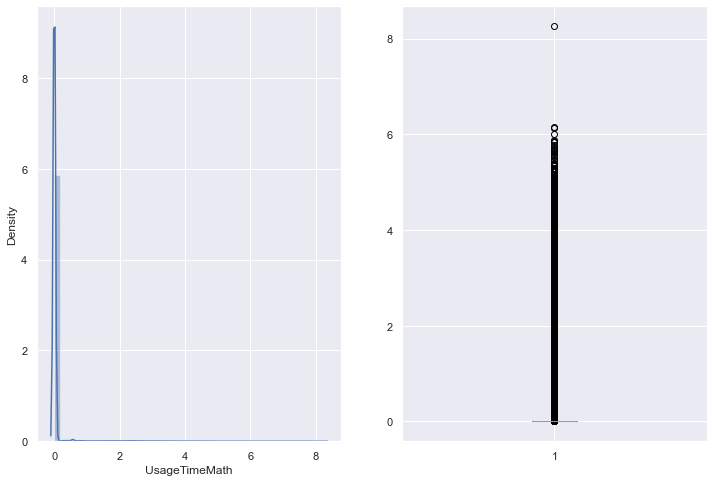


----- UsageTimePhonics -----
count    158981.000000
mean          0.067203
std           0.402041
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.405152
Name: UsageTimePhonics, dtype: float64
* Variance: 0.16163694227792538
* Median: 0.0
* Skewness: 6.858843708410208
* Kurtosis: 50.82366863763933
* Percentage of outliers: 0.03495386241123153
* Number of missing value: 0


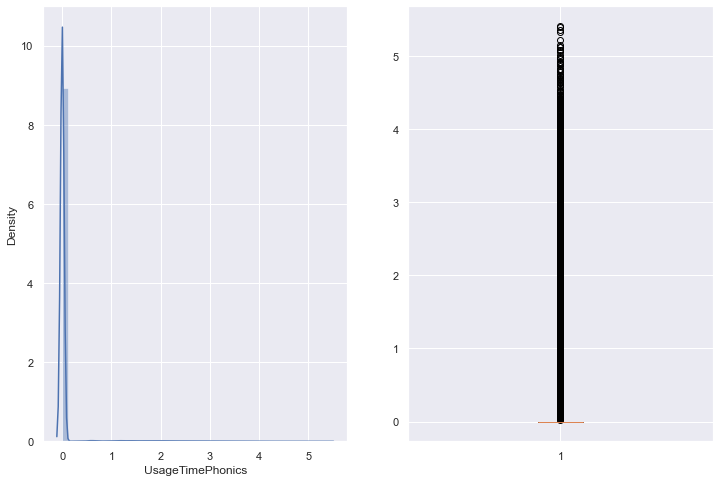


----- UsageTimeVietnamese -----
count    158981.000000
mean          1.353028
std           1.488565
min           0.000000
25%           0.000000
50%           0.802002
75%           2.584752
max           6.821053
Name: UsageTimeVietnamese, dtype: float64
* Variance: 2.215824316914866
* Median: 0.8020015854720274
* Skewness: 0.7228527903803638
* Kurtosis: -0.7100036554453344
* Percentage of outliers: 6.919065800315761e-05
* Number of missing value: 0


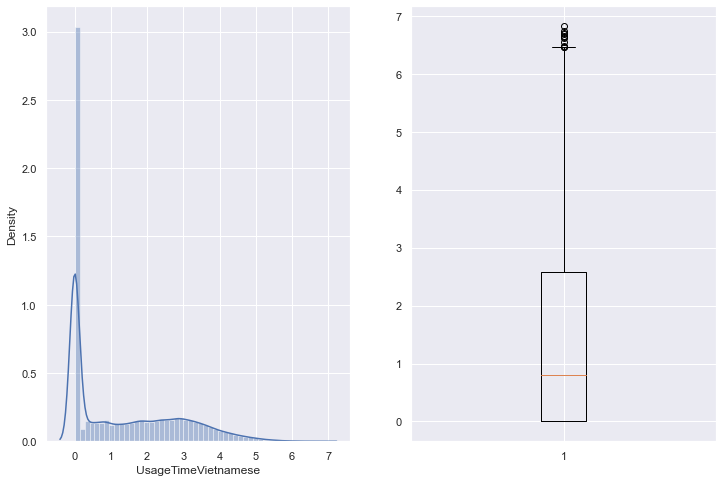


----- RecordDiscovery -----
count    158981.000000
mean          0.705616
std           0.957292
min           0.000000
25%           0.000000
50%           0.000000
75%           1.386294
max           5.327876
Name: RecordDiscovery, dtype: float64
* Variance: 0.9164080828262645
* Median: 0.0
* Skewness: 1.1356818813255307
* Kurtosis: 0.17679599872855434
* Percentage of outliers: 0.00703857693686667
* Number of missing value: 0


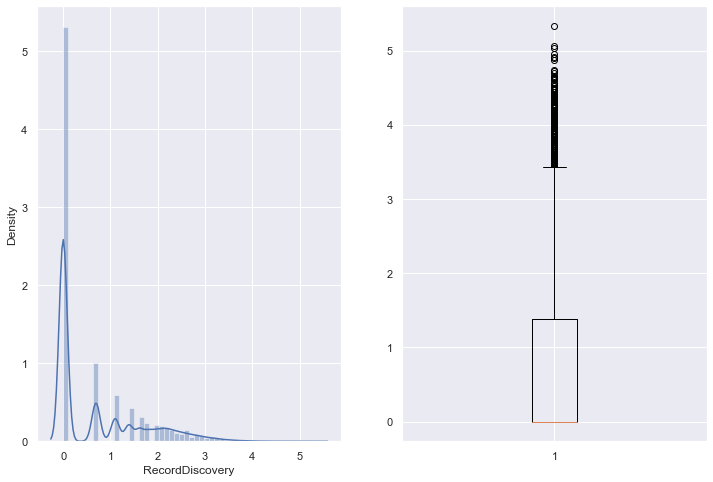


----- RecordEntertainment -----
count    158981.000000
mean          0.856634
std           1.146229
min           0.000000
25%           0.000000
50%           0.000000
75%           1.609438
max           6.704414
Name: RecordEntertainment, dtype: float64
* Variance: 1.313841288440111
* Median: 0.0
* Skewness: 1.201068545759807
* Kurtosis: 0.5388398149498599
* Percentage of outliers: 0.012819141910039564
* Number of missing value: 0


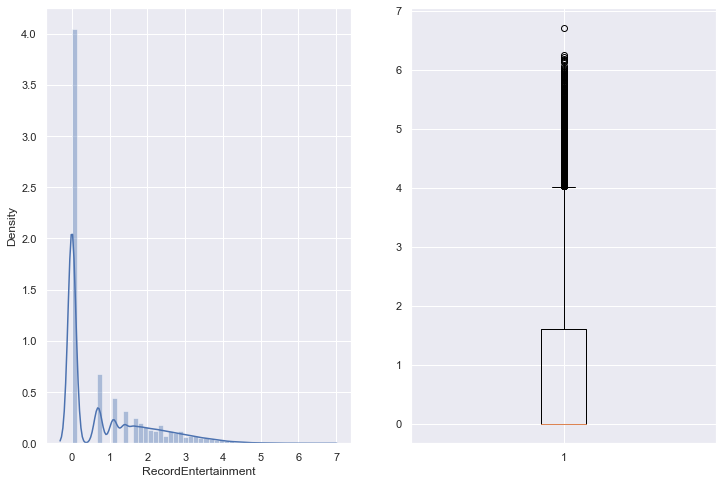


----- RecordLearn -----
count    158981.000000
mean          2.506784
std           1.302400
min           0.000000
25%           1.609438
50%           2.564949
75%           3.433987
max           7.132498
Name: RecordLearn, dtype: float64
* Variance: 1.6962452634996315
* Median: 2.5649493574615367
* Skewness: 0.03155334644367814
* Kurtosis: -0.5941493127439625
* Percentage of outliers: 0.0006793264603946384
* Number of missing value: 0


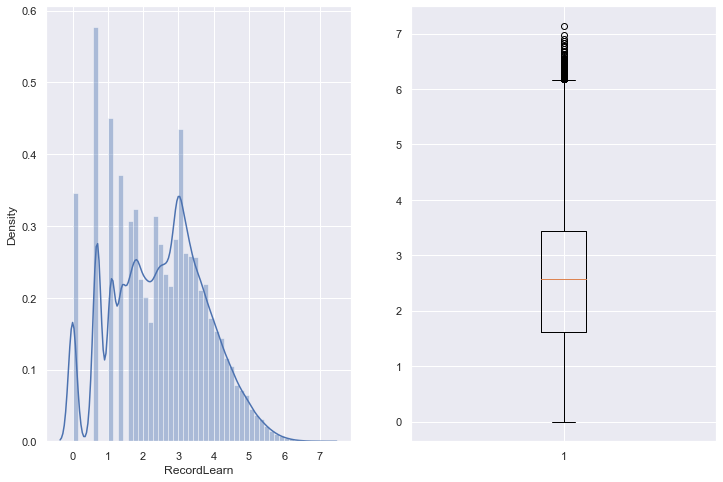


----- UsageTimeDiscovery -----
count    158981.000000
mean          0.910535
std           1.274892
min           0.000000
25%           0.000000
50%           0.000000
75%           1.876407
max           6.362217
Name: UsageTimeDiscovery, dtype: float64
* Variance: 1.6253494748572743
* Median: 0.0
* Skewness: 1.0726599887244581
* Kurtosis: -0.23081505071117858
* Percentage of outliers: 0.001943628483906882
* Number of missing value: 0


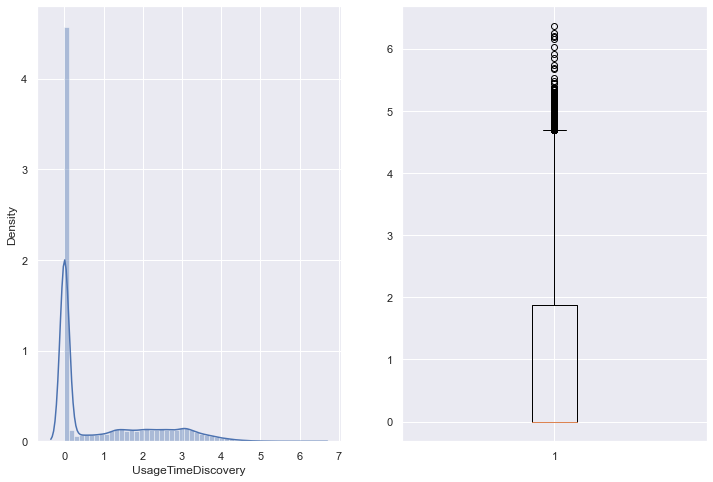


----- UsageTimeEntertainment -----
count    158981.000000
mean          0.964150
std           1.404900
min           0.000000
25%           0.000000
50%           0.000000
75%           1.795087
max           7.391816
Name: UsageTimeEntertainment, dtype: float64
* Variance: 1.9737452106625455
* Median: 0.0
* Skewness: 1.3279407643861907
* Kurtosis: 0.656561424002748
* Percentage of outliers: 0.02439285197602229
* Number of missing value: 0


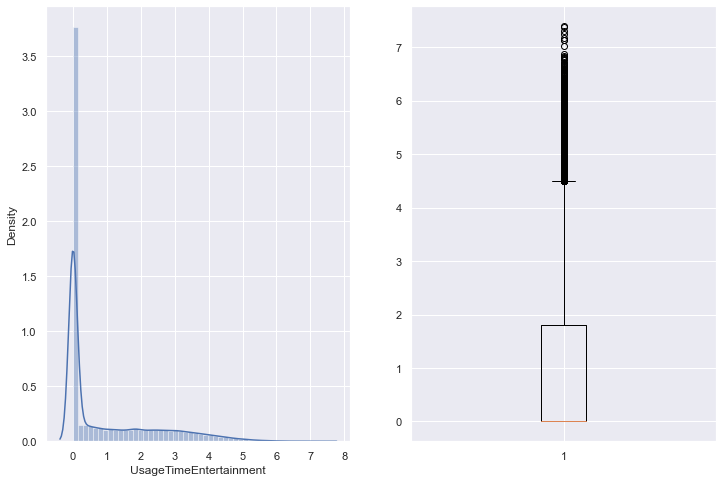


----- UsageTimeLearn -----
count    158981.000000
mean          2.311189
std           1.311486
min           0.000000
25%           1.266948
50%           2.390596
75%           3.237501
max           8.274028
Name: UsageTimeLearn, dtype: float64
* Variance: 1.7199948085384988
* Median: 2.390595970316759
* Skewness: 0.09931599812449175
* Kurtosis: -0.6454274699494289
* Percentage of outliers: 0.00044030418729282115
* Number of missing value: 0


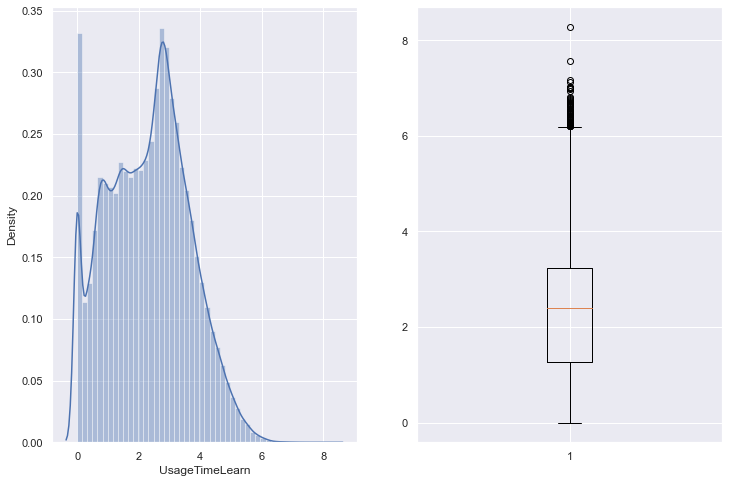


----- MedianUsageTime -----
count    158981.000000
mean          1.827822
std           0.803018
min           0.000000
25%           1.238374
50%           1.867176
75%           2.420368
max           5.357435
Name: MedianUsageTime, dtype: float64
* Variance: 0.6448371475122768
* Median: 1.8671761085128091
* Skewness: -0.03295007306830792
* Kurtosis: -0.5592246148820248
* Percentage of outliers: 0.0010001195111365509
* Number of missing value: 0


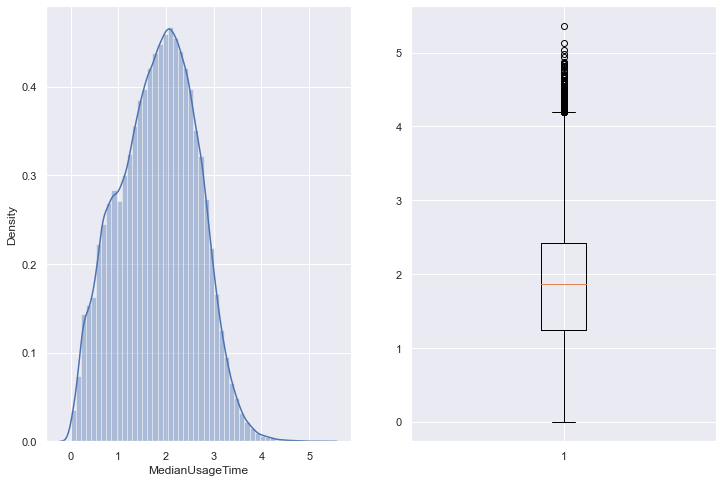


----- MedianRecord -----
count    158981.000000
mean          1.589362
std           0.893897
min           0.000000
25%           1.098612
50%           1.609438
75%           2.197225
max           5.231109
Name: MedianRecord, dtype: float64
* Variance: 0.799051094378958
* Median: 1.6094379124341003
* Skewness: -0.024573301679337023
* Kurtosis: -0.5344627718483319
* Percentage of outliers: 0.002887137456677213
* Number of missing value: 0


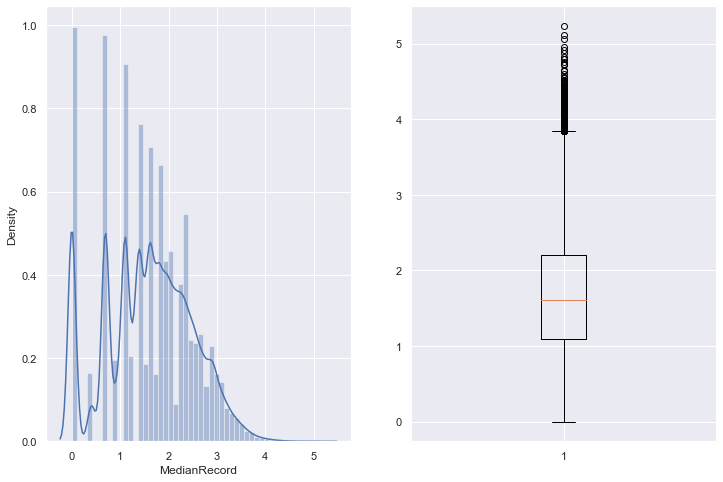


----- MedianPaymentScreen -----
count    158981.000000
mean          0.441771
std           0.642689
min           0.000000
25%           0.000000
50%           0.000000
75%           0.693147
max           5.209486
Name: MedianPaymentScreen, dtype: float64
* Variance: 0.41304922020747903
* Median: 0.0
* Skewness: 1.4647244104887789
* Kurtosis: 1.8042704930251978
* Percentage of outliers: 0.053767431328271935
* Number of missing value: 0


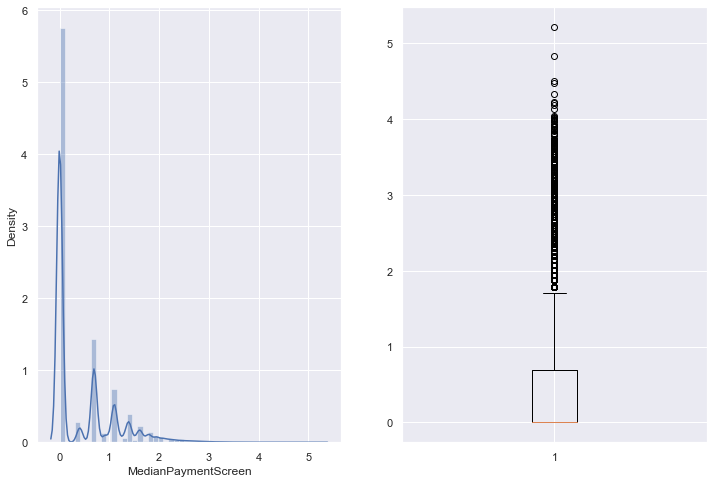


----- AvgTimePerCompletion -----
count    158981.000000
mean          0.684861
std           0.255316
min           0.000000
25%           0.529320
50%           0.643575
75%           0.809236
max           4.224934
Name: AvgTimePerCompletion, dtype: float64
* Variance: 0.06518610721767121
* Median: 0.6435748924294742
* Skewness: 1.0764935448139241
* Kurtosis: 3.204130391905744
* Percentage of outliers: 0.039847528950000315
* Number of missing value: 0


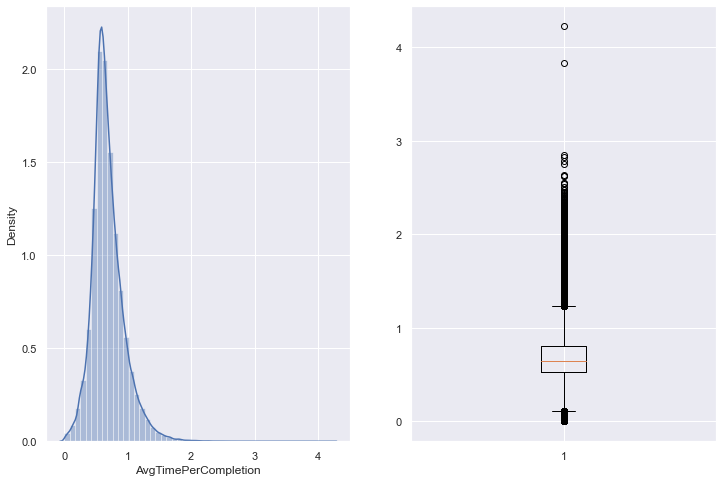


----- InteractionGeneral -----
count    158981.000000
mean          5.368544
std           2.795033
min           0.000000
25%           3.194583
50%           5.573142
75%           7.437371
max          14.906821
Name: InteractionGeneral, dtype: float64
* Variance: 7.812211280734185
* Median: 5.573142136997261
* Skewness: -0.0309116510978612
* Kurtosis: -0.7669105868095039
* Percentage of outliers: 5.6610538366219865e-05
* Number of missing value: 0


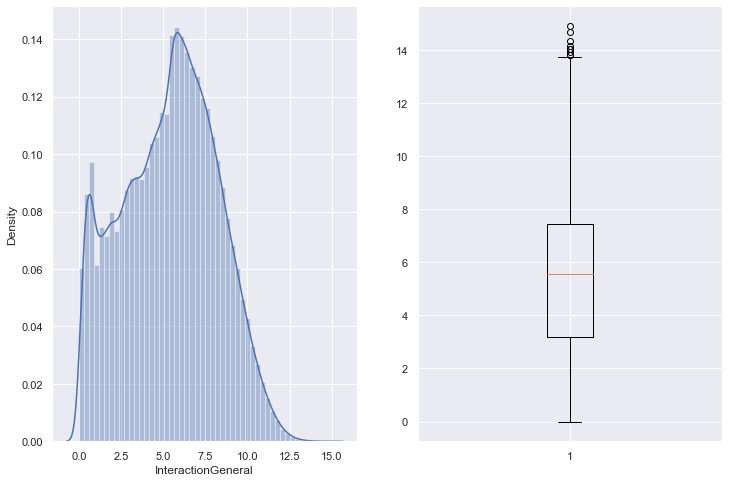


----- InteractionLearn -----
count    158981.000000
mean          4.573890
std           2.768986
min           0.000000
25%           2.294553
50%           4.792230
75%           6.573457
max          14.470218
Name: InteractionLearn, dtype: float64
* Variance: 7.667282035939885
* Median: 4.79223049712922
* Skewness: 0.06504417890719527
* Kurtosis: -0.8005348938525922
* Percentage of outliers: 0.00012580119636937748
* Number of missing value: 0


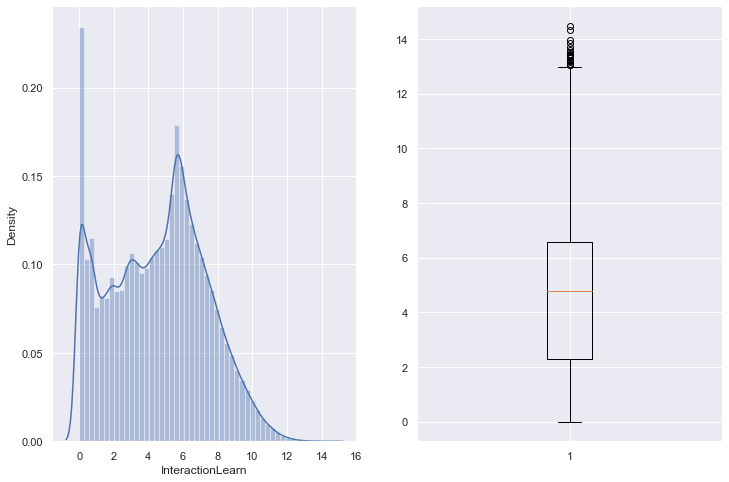


----- InteractionDiscovery -----
count    158981.000000
mean          1.444530
std           2.148785
min           0.000000
25%           0.000000
50%           0.000000
75%           2.724580
max          11.302966
Name: InteractionDiscovery, dtype: float64
* Variance: 4.6172749685142325
* Median: 0.0
* Skewness: 1.2881479011632642
* Kurtosis: 0.40171924823278093
* Percentage of outliers: 0.020763487460765753
* Number of missing value: 0


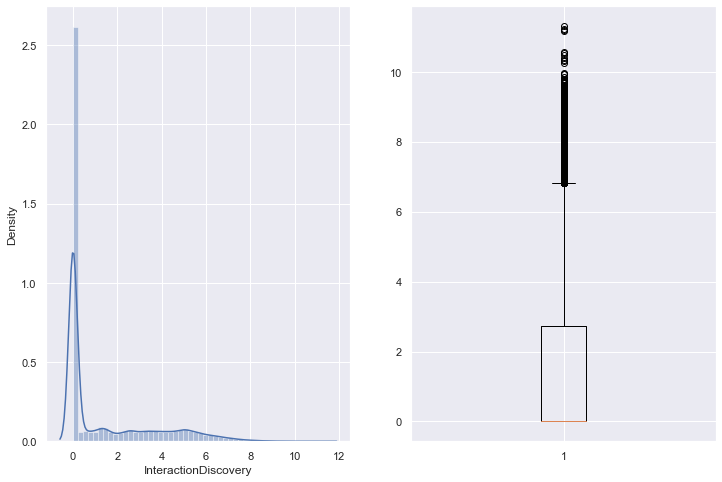


----- InteractionEntertainment -----
count    158981.000000
mean          1.645070
std           2.478753
min           0.000000
25%           0.000000
50%           0.000000
75%           2.969388
max          13.594607
Name: InteractionEntertainment, dtype: float64
* Variance: 6.144217870208737
* Median: 0.0
* Skewness: 1.4232924816774708
* Kurtosis: 0.9885093690551909
* Percentage of outliers: 0.038193243217743
* Number of missing value: 0


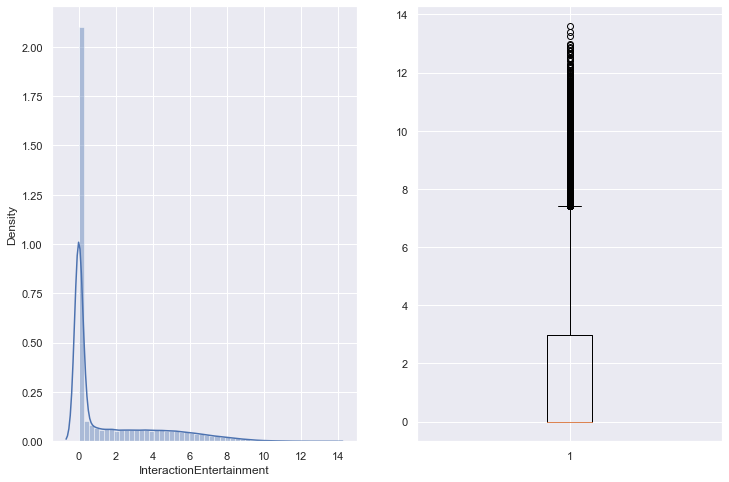


----- MedianInteraction -----
count    158981.000000
mean          3.293577
std           1.660255
min           0.000000
25%           2.039921
50%           3.348148
75%           4.508108
max          10.043499
Name: MedianInteraction, dtype: float64
* Variance: 2.756448095003753
* Median: 3.34814816057234
* Skewness: 0.03817455426702155
* Kurtosis: -0.641854872104938
* Percentage of outliers: 0.0007673872978532026
* Number of missing value: 0


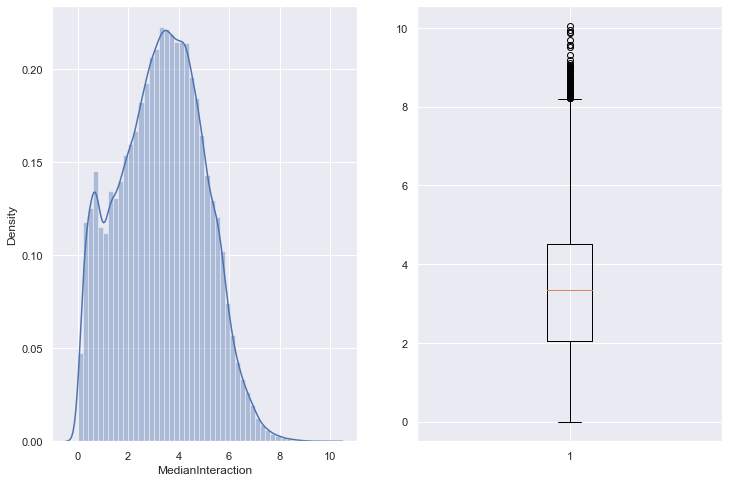

In [34]:
for col in data.columns[1:]:
    if col not in excludes:
        fc.continuous_analysis(data, col)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158981 entries, 0 to 163039
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UserID                    158981 non-null  object 
 1   Recency                   158981 non-null  int64  
 2   ContentFrequent           158981 non-null  int64  
 3   PaymentScreenFrequent     158981 non-null  int64  
 4   TotalUsageTime            158981 non-null  float64
 5   TotalRecords              158981 non-null  float64
 6   ModeFirstHour             158981 non-null  int64  
 7   ModeLastHour              158981 non-null  int64  
 8   ModeLastDay               158981 non-null  int64  
 9   ModeDayofweek             158981 non-null  int64  
 10  TotalChild                158981 non-null  float64
 11  MedianChildAge            158981 non-null  float64
 12  No.Female                 158981 non-null  float64
 13  No.Male                   158981 non-null  f

In [36]:
data

,UserID,Recency,ContentFrequent,PaymentScreenFrequent,TotalUsageTime,TotalRecords,ModeFirstHour,ModeLastHour,ModeLastDay,ModeDayofweek,...,firstPaymentType,JoinMonth,gapday,AvgTimePerCompletion,InteractionGeneral,InteractionLearn,InteractionDiscovery,InteractionEntertainment,MedianInteraction,Label
0,00002520-3fe9-4d4b-9e1f-e4a72386bf47,9,1,0,2.927453,2.890372,22,22,11,0,...,NaN,7.0,NaN,0.684219,5.765943,5.765943,0.000000,0.000000,5.765943,0
1,00007f9f-be36-4a0d-a2a8-167231588625,9,1,0,2.060514,1.098612,18,18,12,1,...,NaN,4.0,NaN,1.188859,3.070376,0.000000,3.070376,0.000000,3.070376,0
2,00015787-1ed9-45b9-9c5f-2613e2ca8409,1,15,79,5.660457,5.598422,18,20,18,0,...,NaN,4.0,NaN,0.722850,11.255405,8.902477,8.296547,9.690904,4.421247,0
3,0001f256-edcf-4980-b84b-85d85745fd0f,8,3,0,3.774139,4.110874,8,20,22,4,...,NaN,7.0,NaN,0.529277,7.862174,7.830744,0.488580,0.000000,5.845108,0
4,000234a9-a233-4476-9023-9b83f331b7f6,9,2,0,2.746630,3.295837,18,18,16,6,...,NaN,4.0,NaN,0.432023,5.978709,5.922436,0.239017,0.000000,4.599982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163035,fffdf7d4-a6c3-46e6-bbb7-045211d7007f,9,1,0,0.392042,0.000000,21,21,13,0,...,NaN,6.0,NaN,0.392042,0.392042,0.392042,0.000000,0.000000,0.392042,0
163036,ffff2125-692f-4755-bfcd-59219e49d6d6,9,1,1,1.613430,1.609438,20,21,12,6,...,NaN,6.0,NaN,0.590006,3.049273,3.049273,0.000000,0.000000,3.049273,0
163037,ffff56de-effe-4b67-9990-33240f51c866,9,2,2,1.418277,1.791759,20,20,3,6,...,NaN,7.0,NaN,0.419806,2.984671,2.656757,0.392042,0.000000,1.739589,0
163038,ffff81a7-4938-4d26-8492-bd8e4acc2a19,2,5,0,4.007515,3.433987,12,12,24,4,...,NaN,6.0,NaN,1.008782,7.423754,2.132982,4.663439,6.619620,2.415914,0


In [37]:
X = data.drop(['UserID', 'Label', 'firstPaymentType', 'gapday'], axis = 1)
y = data['Label']

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [39]:
def ScaleData(train_data, test_data, method=None):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
    if method==None:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    elif method == 'min_max':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    elif method == 'robust':
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [40]:
X_train_norm, X_test_norm = ScaleData(X_train, X_test, method=None)
X_train_mm, X_test_mm = ScaleData(X_train, X_test, method='min_max')
X_train_rb, X_test_rb = ScaleData(X_train, X_test, method='robust')

In [41]:
sw = fc.BinarySampleWeights(X_train.shape[0], y_train)
sw_zen = fc.BinarySampleWeights(X_train.shape[0], y_train, method = 'zen')
sw_isns = fc.BinarySampleWeights(X_train.shape[0], y_train, method = 'isns')
sw_eff = fc.BinarySampleWeights(X_train.shape[0], y_train, method = 'ens', beta = 0.99999)

In [42]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state = 42)
logit_model = logit.fit(X_train, y_train)

logit_model.score(X_train, y_train)

0.9476820983771543

In [43]:
fc.eval_clf_testset(logit_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9485

* Confusion Matrix: 
[[29544   193]
 [ 1446   614]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29737
           1       0.76      0.30      0.43      2060

    accuracy                           0.95     31797
   macro avg       0.86      0.65      0.70     31797
weighted avg       0.94      0.95      0.94     31797



In [44]:
logit = LogisticRegression(random_state = 42)
logit_model = logit.fit(X_train_norm, y_train)

logit_model.score(X_train_norm, y_train)

0.9487199647754434

In [45]:
fc.eval_clf_testset(logit_model, X_test_norm, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9492

* Confusion Matrix: 
[[29562   175]
 [ 1441   619]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29737
           1       0.78      0.30      0.43      2060

    accuracy                           0.95     31797
   macro avg       0.87      0.65      0.70     31797
weighted avg       0.94      0.95      0.94     31797



In [46]:
import lightgbm as lgbm

lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 100,
                               scale_pos_weight=6,
                               metric='auc')

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.934748081519688

In [47]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9273

* Confusion Matrix: 
[[28161  1576]
 [  737  1323]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     29737
           1       0.46      0.64      0.53      2060

    accuracy                           0.93     31797
   macro avg       0.72      0.79      0.75     31797
weighted avg       0.94      0.93      0.93     31797



In [48]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 500,
                               scale_pos_weight=5,
                               metric='auc')

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.9687696565605737

In [49]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9427

* Confusion Matrix: 
[[28763   974]
 [  848  1212]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29737
           1       0.55      0.59      0.57      2060

    accuracy                           0.94     31797
   macro avg       0.76      0.78      0.77     31797
weighted avg       0.94      0.94      0.94     31797



ROC AUC score: 0.7778


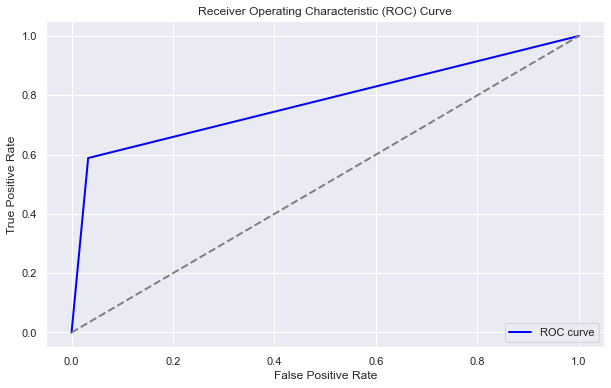

In [50]:
fc.plot_roc_curve(y_test, lgbm_model.predict(X_test))

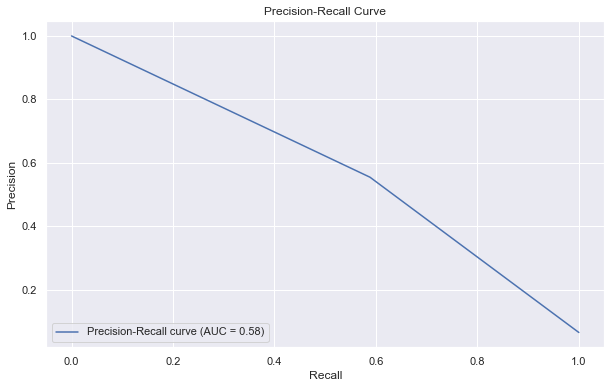

In [51]:
fc.plot_precision_recall_curve(lgbm_model, X_test, y_test)

In [52]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1200,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               scale_pos_weight=6,
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=3
                              )

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.9345357906654925

In [53]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9268

* Confusion Matrix: 
[[28137  1600]
 [  726  1334]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     29737
           1       0.45      0.65      0.53      2060

    accuracy                           0.93     31797
   macro avg       0.71      0.80      0.75     31797
weighted avg       0.94      0.93      0.93     31797



ROC AUC score: 0.7969


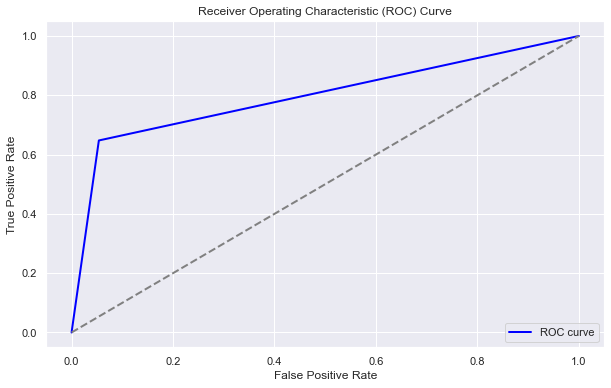

In [54]:
fc.plot_roc_curve(y_test, lgbm_model.predict(X_test))

In [55]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1200,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               scale_pos_weight=6,
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85)

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.9738567744370361

In [56]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9413

* Confusion Matrix: 
[[28715  1022]
 [  846  1214]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29737
           1       0.54      0.59      0.57      2060

    accuracy                           0.94     31797
   macro avg       0.76      0.78      0.77     31797
weighted avg       0.94      0.94      0.94     31797



ROC AUC score: 0.7775


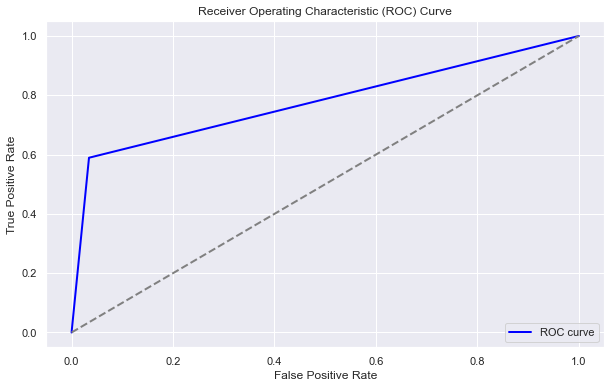

In [57]:
fc.plot_roc_curve(y_test, lgbm_model.predict(X_test))

In [73]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1200,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               class_weight = {0: sw_isns[0], 1: sw_isns[1]},
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=3
                              )

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.9477214114983017

In [74]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9434

* Confusion Matrix: 
[[28766   971]
 [  829  1231]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29737
           1       0.56      0.60      0.58      2060

    accuracy                           0.94     31797
   macro avg       0.77      0.78      0.77     31797
weighted avg       0.95      0.94      0.94     31797



ROC AUC score: 0.7825


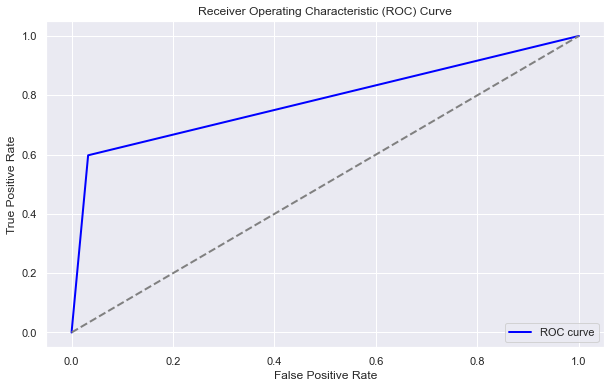

In [75]:
fc.plot_roc_curve(y_test, lgbm_model.predict(X_test))

In [61]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 900,
                               reg_lambda=0.02,
                               scale_pos_weight=5,
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85)

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.9684315637187068

In [62]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9431

* Confusion Matrix: 
[[28777   960]
 [  848  1212]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29737
           1       0.56      0.59      0.57      2060

    accuracy                           0.94     31797
   macro avg       0.76      0.78      0.77     31797
weighted avg       0.94      0.94      0.94     31797



ROC AUC score: 0.7780


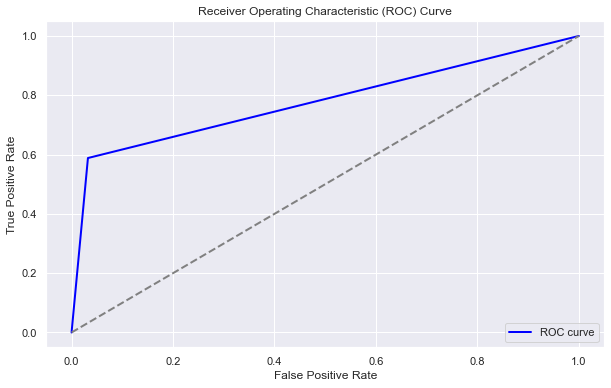

In [63]:
fc.plot_roc_curve(y_test, lgbm_model.predict(X_test))

In [64]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1200,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=3)

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.8790335262297144

In [65]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.8729

* Confusion Matrix: 
[[26188  3549]
 [  493  1567]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     29737
           1       0.31      0.76      0.44      2060

    accuracy                           0.87     31797
   macro avg       0.64      0.82      0.68     31797
weighted avg       0.94      0.87      0.90     31797



ROC AUC score: 0.8207


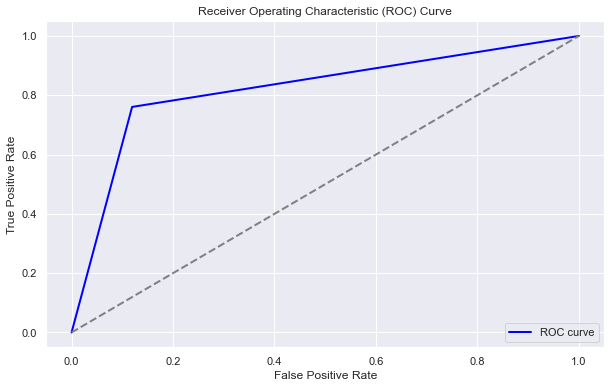

In [66]:
fc.plot_roc_curve(y_test, lgbm_model.predict(X_test))

In [67]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1200,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               scale_pos_weight=15,
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=3)

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.8756997735564221

In [68]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.869

* Confusion Matrix: 
[[26063  3674]
 [  490  1570]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     29737
           1       0.30      0.76      0.43      2060

    accuracy                           0.87     31797
   macro avg       0.64      0.82      0.68     31797
weighted avg       0.94      0.87      0.89     31797



ROC AUC score: 0.8193


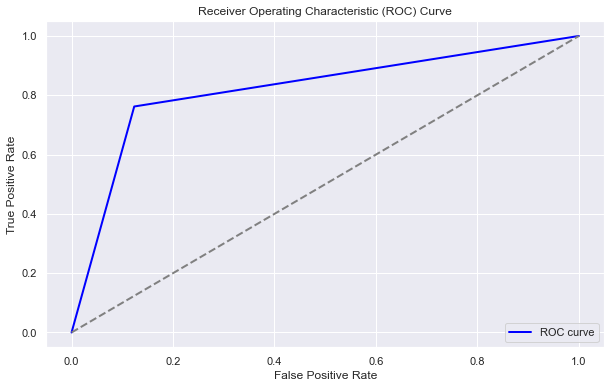

In [69]:
fc.plot_roc_curve(y_test, lgbm_model.predict(X_test))

In [76]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()

gauss_model = gauss.fit(X_train, y_train)
gauss_model.score(X_train, y_train)

0.8213926280035224

In [77]:
fc.eval_clf_testset(gauss_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.8209

* Confusion Matrix: 
[[24723  5014]
 [  681  1379]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     29737
           1       0.22      0.67      0.33      2060

    accuracy                           0.82     31797
   macro avg       0.59      0.75      0.61     31797
weighted avg       0.92      0.82      0.86     31797



In [78]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 42)

tree_clf = tree.fit(X_train, y_train)
tree_clf.score(X_train, y_train)

1.0

In [79]:
fc.eval_clf_testset(tree_clf, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9212

* Confusion Matrix: 
[[28405  1332]
 [ 1173   887]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     29737
           1       0.40      0.43      0.41      2060

    accuracy                           0.92     31797
   macro avg       0.68      0.69      0.69     31797
weighted avg       0.92      0.92      0.92     31797



In [80]:
logit = LogisticRegression(random_state = 42, class_weight = {0: sw[0], 1: sw[1]})
logit_model = logit.fit(X_train, y_train)

logit_model.score(X_train, y_train)

0.8175242168826268

In [81]:
fc.eval_clf_testset(logit_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.8183

* Confusion Matrix: 
[[24453  5284]
 [  494  1566]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     29737
           1       0.23      0.76      0.35      2060

    accuracy                           0.82     31797
   macro avg       0.60      0.79      0.62     31797
weighted avg       0.93      0.82      0.86     31797



In [82]:
logit = LogisticRegression(random_state = 42, class_weight = {0: sw_zen[0], 1: sw_zen[1]})
logit_model = logit.fit(X_train, y_train)

logit_model.score(X_train, y_train)

0.8157079506856209

In [83]:
fc.eval_clf_testset(logit_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.8166

* Confusion Matrix: 
[[24388  5349]
 [  484  1576]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     29737
           1       0.23      0.77      0.35      2060

    accuracy                           0.82     31797
   macro avg       0.60      0.79      0.62     31797
weighted avg       0.93      0.82      0.86     31797



In [84]:
logit = LogisticRegression(random_state = 42, class_weight = {0: sw_isns[0], 1: sw_isns[1]})
logit_model = logit.fit(X_train, y_train)

logit_model.score(X_train, y_train)

0.9273021763743867

In [85]:
fc.eval_clf_testset(logit_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9279

* Confusion Matrix: 
[[28406  1331]
 [  961  1099]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     29737
           1       0.45      0.53      0.49      2060

    accuracy                           0.93     31797
   macro avg       0.71      0.74      0.73     31797
weighted avg       0.93      0.93      0.93     31797



In [86]:
logit = LogisticRegression(random_state = 42, class_weight = {0: sw_eff[0], 1: sw_eff[1]})
logit_model = logit.fit(X_train, y_train)

logit_model.score(X_train, y_train)

0.8722795320166059

In [87]:
fc.eval_clf_testset(logit_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.8739

* Confusion Matrix: 
[[26351  3386]
 [  624  1436]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     29737
           1       0.30      0.70      0.42      2060

    accuracy                           0.87     31797
   macro avg       0.64      0.79      0.67     31797
weighted avg       0.93      0.87      0.90     31797



In [88]:
tree = DecisionTreeClassifier(random_state = 42, class_weight = {0: sw[0], 1: sw[1]})

tree_model = tree.fit(X_train, y_train)
tree_model.score(X_train, y_train)

1.0

In [89]:
fc.eval_clf_testset(tree_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9252

* Confusion Matrix: 
[[28578  1159]
 [ 1218   842]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     29737
           1       0.42      0.41      0.41      2060

    accuracy                           0.93     31797
   macro avg       0.69      0.68      0.69     31797
weighted avg       0.92      0.93      0.92     31797



In [90]:
tree = DecisionTreeClassifier(random_state = 42, class_weight = {0: sw_zen[0], 1: sw_zen[1]})

tree_model = tree.fit(X_train, y_train)
tree_model.score(X_train, y_train)

1.0

In [91]:
fc.eval_clf_testset(tree_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9253

* Confusion Matrix: 
[[28568  1169]
 [ 1207   853]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     29737
           1       0.42      0.41      0.42      2060

    accuracy                           0.93     31797
   macro avg       0.69      0.69      0.69     31797
weighted avg       0.92      0.93      0.92     31797



In [92]:
tree = DecisionTreeClassifier(random_state = 42, class_weight = {0: sw_isns[0], 1: sw_isns[1]})

tree_model = tree.fit(X_train, y_train)
tree_model.score(X_train, y_train)

1.0

In [93]:
fc.eval_clf_testset(tree_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9216

* Confusion Matrix: 
[[28452  1285]
 [ 1209   851]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     29737
           1       0.40      0.41      0.41      2060

    accuracy                           0.92     31797
   macro avg       0.68      0.68      0.68     31797
weighted avg       0.92      0.92      0.92     31797



In [94]:
tree = DecisionTreeClassifier(random_state = 42, class_weight = {0: sw_eff[0], 1: sw_eff[1]})

tree_model = tree.fit(X_train, y_train)
tree_model.score(X_train, y_train)

1.0

In [95]:
fc.eval_clf_testset(tree_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9217

* Confusion Matrix: 
[[28469  1268]
 [ 1222   838]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     29737
           1       0.40      0.41      0.40      2060

    accuracy                           0.92     31797
   macro avg       0.68      0.68      0.68     31797
weighted avg       0.92      0.92      0.92     31797



In [96]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42, n_estimators = 100)
forest_model = forest.fit(X_train, y_train)

forest_model.score(X_train, y_train)

0.9999685495030821

In [97]:
fc.eval_clf_testset(forest_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9543

* Confusion Matrix: 
[[29595   142]
 [ 1310   750]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     29737
           1       0.84      0.36      0.51      2060

    accuracy                           0.95     31797
   macro avg       0.90      0.68      0.74     31797
weighted avg       0.95      0.95      0.95     31797



In [98]:
forest = RandomForestClassifier(random_state = 42, n_estimators = 100, class_weight = {0: sw_eff[0], 1: sw_eff[1]})
forest_model = forest.fit(X_train, y_train)

forest_model.score(X_train, y_train)

0.9999606868788526

In [99]:
fc.eval_clf_testset(forest_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9538

* Confusion Matrix: 
[[29623   114]
 [ 1356   704]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     29737
           1       0.86      0.34      0.49      2060

    accuracy                           0.95     31797
   macro avg       0.91      0.67      0.73     31797
weighted avg       0.95      0.95      0.94     31797



In [100]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 600,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               class_weight = {0: sw_isns[0], 1: sw_isns[1]},
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=4)

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.9491759969807523

In [101]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9429

* Confusion Matrix: 
[[28763   974]
 [  841  1219]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29737
           1       0.56      0.59      0.57      2060

    accuracy                           0.94     31797
   macro avg       0.76      0.78      0.77     31797
weighted avg       0.94      0.94      0.94     31797



In [102]:
data.to_csv('ICK_Active8thdays.csv', index=False)

In [103]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)

In [104]:
class_weights_dict = dict(enumerate(class_weights))

In [105]:
class_weights_dict

{0: 0.5346379160753559, 1: 7.717524271844661}

In [106]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 900,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               class_weight = class_weights_dict,
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=3)

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.8767219147062524

In [107]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.872

* Confusion Matrix: 
[[26163  3574]
 [  497  1563]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     29737
           1       0.30      0.76      0.43      2060

    accuracy                           0.87     31797
   macro avg       0.64      0.82      0.68     31797
weighted avg       0.94      0.87      0.90     31797



In [108]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_model = xgb_clf.fit(X_train, y_train)

xgb_model.score(X_train, y_train)

0.9683608001006416

In [109]:
fc.eval_clf_testset(xgb_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9559

* Confusion Matrix: 
[[29511   226]
 [ 1177   883]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29737
           1       0.80      0.43      0.56      2060

    accuracy                           0.96     31797
   macro avg       0.88      0.71      0.77     31797
weighted avg       0.95      0.96      0.95     31797



In [110]:
xgb_clf = xgb.XGBClassifier(random_state = 42, n_estimators = 900,
                            colsample_bytree=0.5646751146007976,
                            learning_rate=0.1419865761603358,
                            max_bin=824,
                            scale_pos_weight=5,
                            min_child_weight=1,
                            reg_alpha=1.6259583347890365e-07,
                            reg_lambda=2.110691851528507e-08,
                            subsample=0.879020578464637,
                            objective='binary:logistic',
                            max_depth=3,
                            n_jobs=-1,
                            verbosity=0)

xgb_model = xgb_clf.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.9492231727261291

In [111]:
fc.eval_clf_testset(xgb_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9364

* Confusion Matrix: 
[[28506  1231]
 [  791  1269]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     29737
           1       0.51      0.62      0.56      2060

    accuracy                           0.94     31797
   macro avg       0.74      0.79      0.76     31797
weighted avg       0.94      0.94      0.94     31797



In [112]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy='minority')

X_train_rs, y_train_rs = sm.fit_resample(X_train, y_train)

In [113]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1500,
                               scale_pos_weight=5)

lgbm_model = lgbm_clf.fit(X_train_rs, y_train_rs)

lgbm_model.score(X_train_rs, y_train_rs)

0.9965235741189131

In [114]:
fc.eval_clf_testset(lgbm_model, X_train, y_train)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9935

* Confusion Matrix: 
[[118322    622]
 [   205   8035]]

* Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    118944
           1       0.93      0.98      0.95      8240

    accuracy                           0.99    127184
   macro avg       0.96      0.98      0.97    127184
weighted avg       0.99      0.99      0.99    127184



In [115]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9466

* Confusion Matrix: 
[[29000   737]
 [  961  1099]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     29737
           1       0.60      0.53      0.56      2060

    accuracy                           0.95     31797
   macro avg       0.78      0.75      0.77     31797
weighted avg       0.94      0.95      0.95     31797



In [118]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1000,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
#                                scale_pos_weight=5,
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=3)

lgbm_model = lgbm_clf.fit(X_train_rs, y_train_rs)

lgbm_model.score(X_train_rs, y_train_rs)

0.9729998991121872

In [119]:
fc.eval_clf_testset(lgbm_model, X_test, y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9548

* Confusion Matrix: 
[[29426   311]
 [ 1127   933]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29737
           1       0.75      0.45      0.56      2060

    accuracy                           0.95     31797
   macro avg       0.86      0.72      0.77     31797
weighted avg       0.95      0.95      0.95     31797



# Feature Selection 

In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158981 entries, 0 to 163039
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Recency                   158981 non-null  int64  
 1   ContentFrequent           158981 non-null  int64  
 2   PaymentScreenFrequent     158981 non-null  int64  
 3   TotalUsageTime            158981 non-null  float64
 4   TotalRecords              158981 non-null  float64
 5   ModeFirstHour             158981 non-null  int64  
 6   ModeLastHour              158981 non-null  int64  
 7   ModeLastDay               158981 non-null  int64  
 8   ModeDayofweek             158981 non-null  int64  
 9   TotalChild                158981 non-null  float64
 10  MedianChildAge            158981 non-null  float64
 11  No.Female                 158981 non-null  float64
 12  No.Male                   158981 non-null  float64
 13  No.TypeBrand              158981 non-null  i

In [128]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1200,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               class_weight = {0: sw_isns[0], 1: sw_isns[1]},
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=3
                              )

lgbm_model = lgbm_clf.fit(X_train, y_train)

lgbm_model.score(X_train, y_train)

0.9477214114983017

In [144]:
display_df = ft.eval_clf_model_on_features(lgbm_model, X_train, y_train, X_test, y_test)
display_df.index = ['All features']
display_df

,Accuracy,ROC,Precision,Recall,F1-score,Feature Count
All features,0.943391,0.78246,0.559037,0.597573,0.577663,49


In [145]:
for num in list(range(1, X.shape[1] + 1))[::-1]:
    rfe_ft = ft.run_rfe(lgbm_model, X_train, y_train, num)
    rfe_df = ft.eval_clf_model_on_features(lgbm_model, X_train[rfe_ft], y_train, X_test[rfe_ft], y_test)
    rfe_df.index = ['F-test']
    
    display_df = display_df.append(rfe_df)


In [148]:
display_df

,Accuracy,ROC,Precision,Recall,F1-score,Feature Count
All features,0.943391,0.782460,0.559037,0.597573,0.577663,49
F-test,0.943391,0.782460,0.559037,0.597573,0.577663,49
F-test,0.943359,0.782895,0.558677,0.598544,0.577924,48
F-test,0.943517,0.783205,0.559891,0.599029,0.578799,47
F-test,0.943328,0.785137,0.557899,0.603398,0.579757,46
F-test,0.943265,0.781489,0.558235,0.595631,0.576327,45
F-test,0.942730,0.781881,0.553805,0.597087,0.574632,44
F-test,0.943171,0.782116,0.557318,0.597087,0.576517,43
F-test,0.942888,0.781739,0.555104,0.596602,0.575105,42
F-test,0.943422,0.780670,0.559725,0.593689,0.576207,41


In [151]:
max(display_df['ROC'])

0.785137170162633

In [152]:
display_df.loc[display_df['ROC'] == max(display_df['ROC'])]

,Accuracy,ROC,Precision,Recall,F1-score,Feature Count
F-test,0.943328,0.785137,0.557899,0.603398,0.579757,46


In [153]:
rfe_ft = ft.run_rfe(lgbm_model, X_train, y_train, 46)
# rfe_df = ft.eval_clf_model_on_features(lgbm_model, X_train[rfe_ft], y_train, X_test[rfe_ft], y_test)

In [188]:
rfe_ft

Index(['Recency', 'ContentFrequent', 'PaymentScreenFrequent', 'TotalUsageTime',
       'TotalRecords', 'ModeFirstHour', 'ModeLastHour', 'ModeLastDay',
       'ModeDayofweek', 'TotalChild', 'MedianChildAge', 'No.Female', 'No.Male',
       'BigBrand', 'MediumBrand', 'SmallBrand', 'InteractionEnglish',
       'InteractionMath', 'InteractionPhonics', 'InteractionVietnamese',
       'IsCompletedEnglish', 'IsCompletedMath', 'IsCompletedVietnamese',
       'RecordEnglish', 'RecordMath', 'RecordPhonics', 'RecordVietnamese',
       'UsageTimeEnglish', 'UsageTimePhonics', 'UsageTimeVietnamese',
       'RecordDiscovery', 'RecordEntertainment', 'RecordLearn',
       'UsageTimeDiscovery', 'UsageTimeEntertainment', 'UsageTimeLearn',
       'MedianUsageTime', 'MedianRecord', 'MedianPaymentScreen', 'JoinMonth',
       'AvgTimePerCompletion', 'InteractionGeneral', 'InteractionLearn',
       'InteractionDiscovery', 'InteractionEntertainment',
       'MedianInteraction'],
      dtype='object')

In [161]:
rm_cols = [x for x in X_train.columns if x not in rfe_ft]
rm_cols

['No.TypeBrand', 'IsCompletedPhonics', 'UsageTimeMath']

In [155]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 42, n_estimators = 1200,
                               reg_lambda=0.02,
                               reg_alpha=0.02,
                               class_weight = {0: sw_isns[0], 1: sw_isns[1]},
                               min_child_weight=0.05,
                               learning_rate=0.055,
                               subsample=0.85,
                               colsample_bytree=0.85,
                               max_depth=3
                              )

lgbm_model = lgbm_clf.fit(X_train[rfe_ft], y_train)

lgbm_model.score(X_train[rfe_ft], y_train)

0.9476978236256133

In [189]:
fc.eval_clf_testset(lgbm_model, X_test[rfe_ft], y_test)

----- EVALUATION MODEL PERFORMANCE ON TESTING SET -----
* Testing Accuracy score: 0.9433

* Confusion Matrix: 
[[28752   985]
 [  817  1243]]

* Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29737
           1       0.56      0.60      0.58      2060

    accuracy                           0.94     31797
   macro avg       0.77      0.79      0.77     31797
weighted avg       0.95      0.94      0.94     31797



In [195]:
recalls = recall_score(y_test, lgbm_model.predict(X_test[rfe_ft]))
recalls

0.6033980582524272

In [200]:
round(recall_score(y_test, lgbm_model.predict(X_test[rfe_ft])), 4)

0.6034

In [196]:
precisions = precision_score(y_test, lgbm_model.predict(X_test[rfe_ft]))
precisions

0.5578994614003591

In [197]:
f1_score = f1_score(y_test, lgbm_model.predict(X_test[rfe_ft]))
f1_score

0.5797574626865671

In [198]:
roc_auc_scores = roc_auc_score(y_test, lgbm_model.predict(X_test[rfe_ft]))
roc_auc_scores

0.785137170162633

ROC AUC score: 0.7851


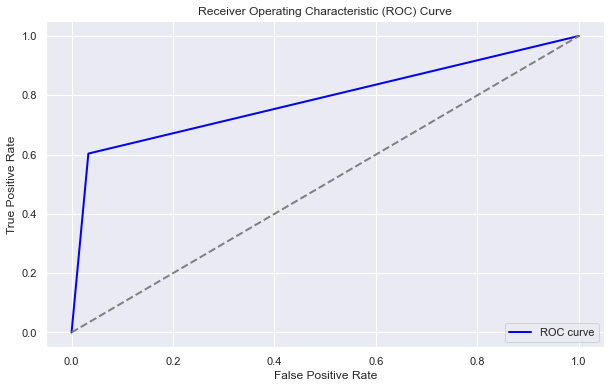

In [157]:
fc.plot_roc_curve(y_test, lgbm_model.predict(X_test[rfe_ft]))

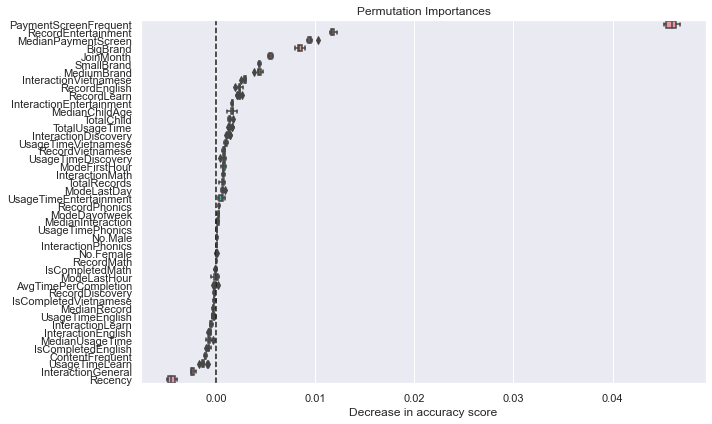

In [165]:
imp_df = ft.permutation_importance_features(lgbm_model, X_train[rfe_ft], y_train, n=10, st=42, plot = True)

In [166]:
imp_df

,PaymentScreenFrequent,RecordEntertainment,MedianPaymentScreen,BigBrand,JoinMonth,SmallBrand,MediumBrand,InteractionVietnamese,RecordEnglish,RecordLearn,...,MedianRecord,UsageTimeEnglish,InteractionLearn,InteractionEnglish,MedianUsageTime,IsCompletedEnglish,ContentFrequent,UsageTimeLearn,InteractionGeneral,Recency
0,0.045194,0.012195,0.009640,0.008444,0.005315,0.004545,0.004324,0.002555,0.002445,0.002422,...,-0.000283,-0.000346,-0.000613,-0.000645,-0.000731,-0.000645,-0.001164,-0.001195,-0.002375,-0.004521
1,0.045265,0.011605,0.009325,0.008342,0.005268,0.004403,0.004356,0.002823,0.001926,0.002618,...,-0.000362,-0.000417,-0.000487,-0.000613,-0.000944,-0.000755,-0.000857,-0.001533,-0.002477,-0.004796
2,0.046224,0.011629,0.009357,0.008971,0.005803,0.004340,0.004277,0.002807,0.002461,0.002437,...,-0.000142,-0.000244,-0.000432,-0.000637,-0.000464,-0.000747,-0.000944,-0.001337,-0.002249,-0.003955
3,0.045996,0.011645,0.009490,0.008303,0.005724,0.004364,0.004269,0.003027,0.002445,0.002382,...,-0.000228,-0.000197,-0.000582,-0.000637,-0.000786,-0.000653,-0.001093,-0.001203,-0.002422,-0.004914
4,0.046421,0.011920,0.009537,0.008885,0.005551,0.004505,0.004285,0.003004,0.002272,0.002091,...,-0.000063,-0.000370,-0.000472,-0.000574,-0.000802,-0.000668,-0.001172,-0.001730,-0.002076,-0.004718
5,0.045721,0.011692,0.009427,0.008319,0.005677,0.004356,0.004301,0.002933,0.002351,0.002319,...,-0.000134,-0.000338,-0.000362,-0.000723,-0.000558,-0.000857,-0.001038,-0.001407,-0.002500,-0.003978
6,0.045249,0.011534,0.009647,0.008790,0.005732,0.004427,0.004560,0.002980,0.002697,0.002131,...,-0.000401,-0.000370,-0.000409,-0.000519,-0.000613,-0.000574,-0.001093,-0.001227,-0.002540,-0.004592
7,0.046798,0.011605,0.009317,0.008161,0.005409,0.004372,0.004655,0.002996,0.002194,0.002335,...,-0.000299,-0.000393,-0.000605,-0.000480,-0.000708,-0.000535,-0.000975,-0.000849,-0.002005,-0.004002
8,0.045988,0.012030,0.009207,0.008515,0.005362,0.004285,0.004718,0.002893,0.002477,0.002398,...,-0.000181,-0.000393,-0.000330,-0.000519,-0.000252,-0.000755,-0.001148,-0.001407,-0.002139,-0.004293
9,0.046484,0.011951,0.010316,0.007996,0.005362,0.004513,0.003892,0.002941,0.002610,0.002508,...,-0.000299,-0.000354,-0.000370,-0.000818,-0.000613,-0.000975,-0.001030,-0.000802,-0.002382,-0.004914


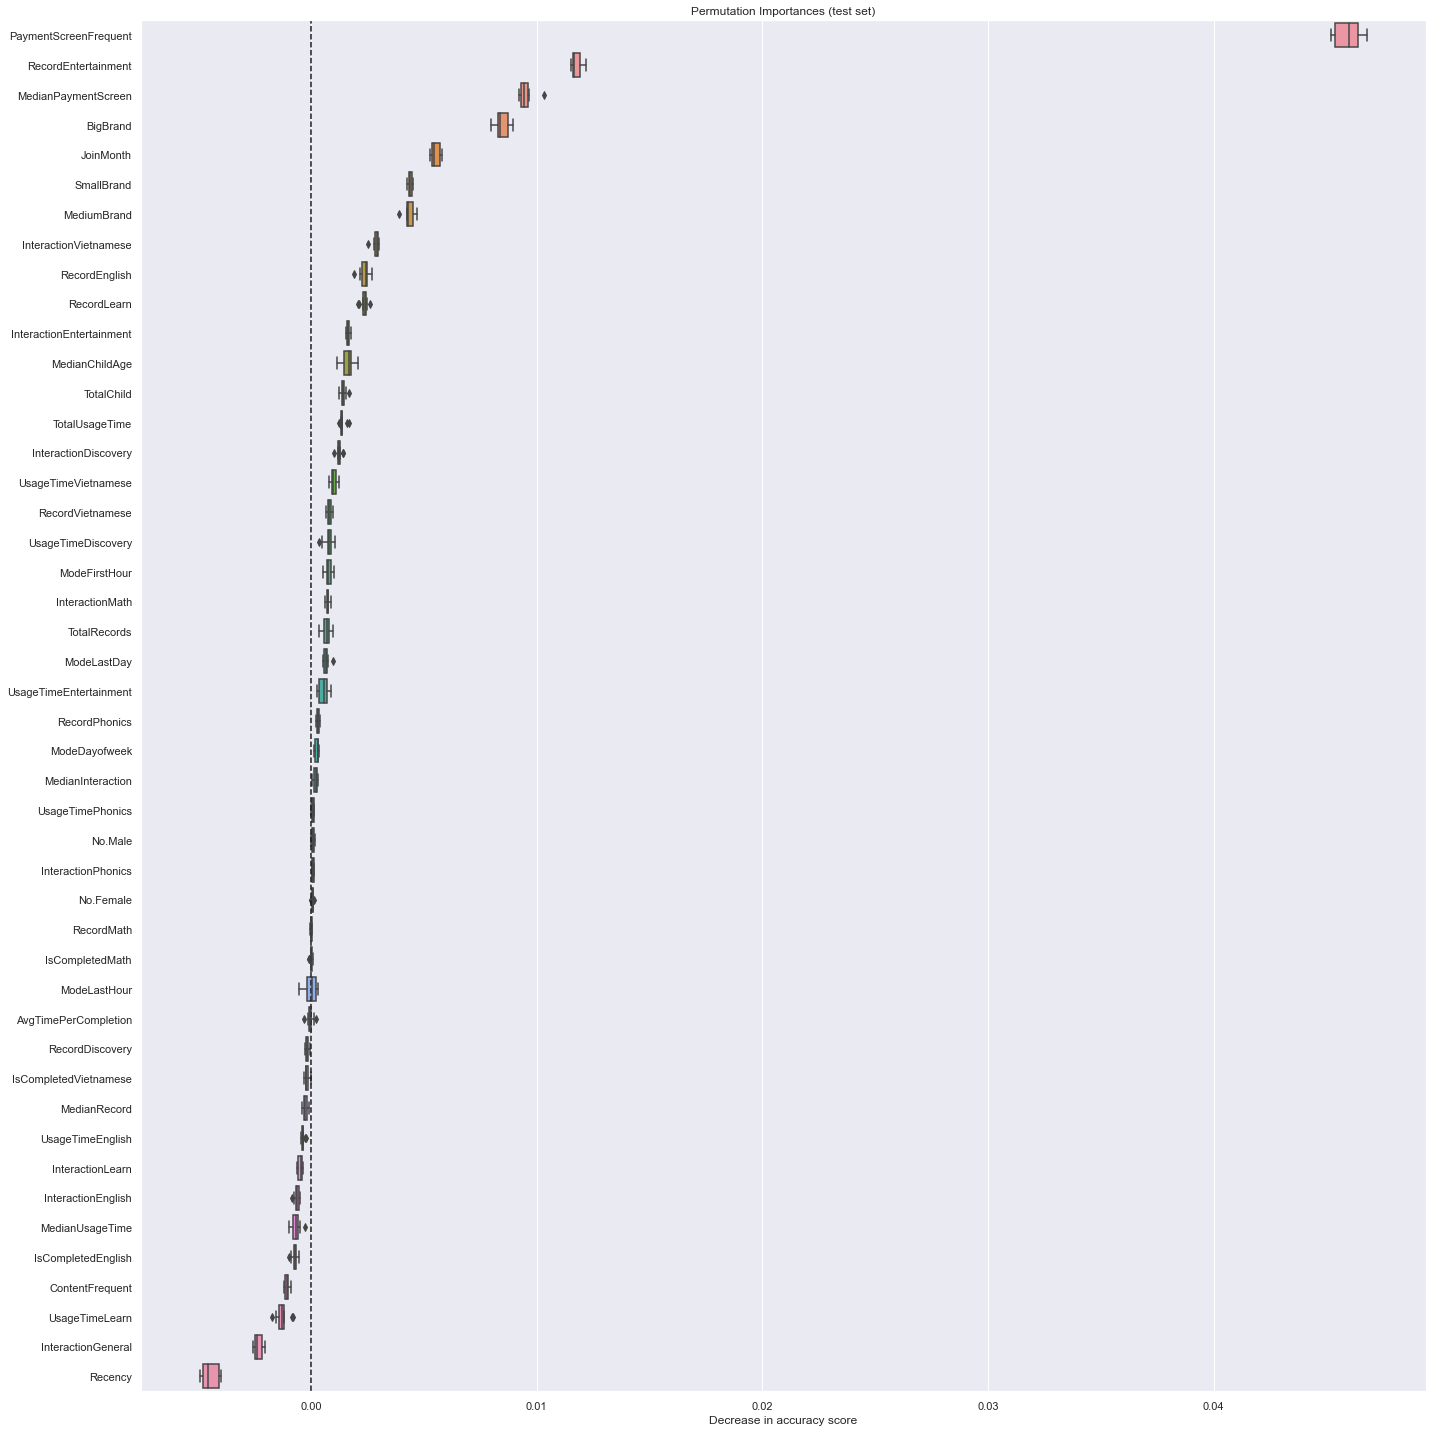

In [168]:
sb.set_palette('bright')
plt.figure(figsize = (20, 20))
ax = sb.boxplot(data = imp_df, orient = 'h')
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score");
ax.figure.tight_layout()

In [169]:
import shap
shap.initjs()

In [170]:
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_test[rfe_ft])

In [171]:
shap_values

[array([[ 2.92586407e-01,  3.82026860e-02, -5.04821759e-01, ...,
         -6.34232745e-02,  8.34447272e-03,  1.57594029e-02],
        [-3.89638282e-01, -4.18447211e-02,  4.40895901e-01, ...,
         -4.75289179e-02, -1.12898040e-01, -1.72294754e-02],
        [ 3.17732836e-01,  2.83338729e-02, -4.30816869e-01, ...,
          2.70517748e-02, -1.14393247e-03, -7.28501648e-03],
        ...,
        [-2.46371079e-01,  5.92392225e-02, -5.71926527e-01, ...,
         -5.84673020e-02, -6.26646280e-03, -4.76693054e-02],
        [ 3.00437424e-01,  1.01731715e-01, -4.29295263e-01, ...,
         -5.84255215e-02, -3.08329260e-04, -8.62653285e-03],
        [ 2.90431729e-01,  7.85570514e-02, -4.22107870e-01, ...,
         -5.64973809e-02,  2.02309049e-03,  1.00857425e-02]]),
 array([[-2.92586407e-01, -3.82026860e-02,  5.04821759e-01, ...,
          6.34232745e-02, -8.34447272e-03, -1.57594029e-02],
        [ 3.89638282e-01,  4.18447211e-02, -4.40895901e-01, ...,
          4.75289179e-02,  1.12898040e

In [173]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[rfe_ft].iloc[3,:])

In [176]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[rfe_ft].iloc[3,:])

In [177]:
explainer.expected_value

[2.603168279936563, -2.603168279936563]

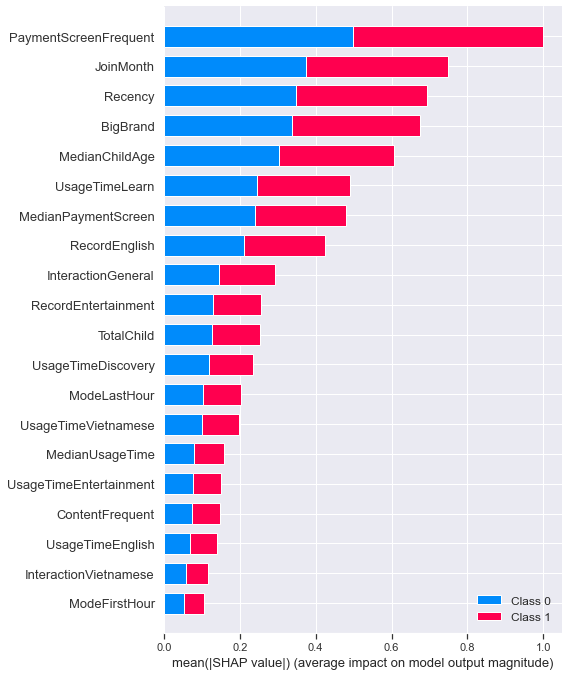

In [181]:
shap.summary_plot(shap_values, X_test[rfe_ft])

In [182]:
ex = shap.KernelExplainer(lgbm_model.predict_proba, X_test[rfe_ft])

Using 31797 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_kernel = ex.shap_values(X_test[rfe_ft])

  0%|          | 0/31797 [00:00<?, ?it/s]

In [183]:
shap.force_plot(ex.expected_value[0], shap_kernel[0][0, :], X_test[rfe_ft].iloc[0, :])

NameError: name 'shap_kernel' is not defined

In [192]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [214]:
X.shape

(158981, 49)